In [1]:
# scRNAseq_GSE279781_DEG_Clusters_v01
# Alberto Bejarano (2024)

In [2]:
import time; start = time.time()
from datetime import datetime; print(datetime.now().strftime("%B %d, %Y %H:%M:%S"))

January 03, 2025 21:11:11


In [3]:
#import warnings; warnings.filterwarnings("ignore") 
#warnings.filterwarnings("ignor", category=FutureWarning)
#warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
import pandas as pd;
pd.options.display.float_format = ' {:.3f}' .format
pd.options.display.max_columns = 200
#         .         .         .         .         .         .         .         .
import warnings; warnings.filterwarnings("ignore")
from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from IPython.display import Audio, display
from statannot import add_stat_annotation
from matplotlib.pyplot import rc_context
#from adjustText import adjust_text
import matplotlib.pyplot as plt
import matplotlib.transforms
import autograd.numpy as np
from scipy import stats
import anndata as ad
import seaborn as sns
import scipy.io as sio
import scanpy as sc
import scipy
import os
sns.__version__

'0.11.2'

In [5]:
resolution = 'leiden_0.25'

In [6]:
GenesOfInterest = ['HLA-DRB1', 'CD83', 'CD69', 'IGHM', 'HLA-DRB5', 'SRGN', 'IL32', 'TNFRSF4', 'KLRB1', 'ZFP36', 'TFF1', 'SPINK1', 'LYZ', 'KRT19', 'IFI27', 'IFI30', 'TYROBP', 'HLA-DRB1',
 'IL1B', 'FCER1G', 'SPARC', 'COL1A1', 'COL3A1', 'COL1A2', 'LUM', 'CCL5', 'NKG7', 'GZMA', 'CST7', 'SRGN', 'MT-ND6', 'MYH9', 'LCP1', 'UBC', 'MACF1', 'KRT8', 'KRT19',
 'ELF3', 'NEAT1', 'KRT18', 'HSPA1B', 'HSPA1A', 'DNAJB1', 'HSP90AA1', 'CD69', 'STMN1', 'GAPDH', 'HIST1H4C', 'RRM2', 'TYMS', 'GZMB', 'JCHAIN', 'SOX4', 'IRF7', 'TYROBP', 
 'JCHAIN', 'IGKC', 'IGHA1', 'TFF1', 'MZB1', 'TPSAB1', 'CPA3', 'TPSB2', 'VIM', 'HPGDS', 'TTR', 'TFF3', 'C6orf58', 'PCSK1N', 'BPIFB2']
#         .         .         .         .         .         .         .         .         .         .         .
#GenesOfInterest = ['HLA-DRB1', 'CD83', 'CD69', 'IGHM', 'HLA-DRB5']

In [7]:
pairs = [(0,1),(2,3),(1,2),(3,4),]
pairs = [('1','2')]

In [8]:
pcHVG_h5ad_file_path   = '../../data/GSE279781/GSE279781_pcHVG.h5ad'
pcHVG_data = ad.read(pcHVG_h5ad_file_path); print(pcHVG_data)

AnnData object with n_obs × n_vars = 5781 × 1460
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ri', 'pct_counts_ri', 'total_counts_hb', 'pct_counts_hb', 'outlier_ngenes', 'outlier_total', 'outlier_hb', 'outlier_mt', 'outlier_ri', 'leiden_0.10', 'leiden_0.25', 'leiden_0.50', 'leiden_0.75', 'leiden_1.00', 'leiden_1.25', 'leiden_1.50', 'leiden_2.00'
    var: 'ensembl_id', 'gene_catg', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt', 'ri', 'hb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden_0.75', 'hvg', 'leiden_0.10', 'leiden_0.10_colors', 'leiden_0.25', 'leiden_0.25_colors', 'leiden_0.50', 'leiden_0.50_colors', 'leiden_0.75', 'leiden_0.75_colors', 'leiden_1.00', 'leiden_1.00_colors', 'leiden_1.25', 'leiden_1.25_colors', 'leiden_1.50', 'leiden_1.50_colors', 'leiden_2.00', 'leiden_2.00_colors', 'log1p', 'logreg', 'neighbors', '

In [9]:
df = sc.get.obs_df(pcHVG_data, keys=[resolution, 'HLA-DRB1'])

In [10]:
df

leiden_0.25  HLA-DRB1
CGTCAGGGTAAATGAC-11           0    -1.006
CGCTATCTCCTTGGTC-11           0     1.233
TGGCCAGTCCCAAGAT-14           0     0.249
CGGACTGTCACCCGAG-14           0     1.182
TACGGATGTATGAATG-14           0     1.069
...                         ...       ...
TCTTCGGGTGTGACCC-14           0     1.379
AGGTCATAGCTGCCCA-14           0     1.273
AGTTGGTCAGGAATCG-14           0     1.274
TTTATGCCAACAACCT-14           0     0.584
CTGTTTAAGTCGATAA-14           0     0.591

[5781 rows x 2 columns]

In [11]:
# Downsample the observations (cells)
print("Remaining cells:\t {}".format(pcHVG_data.n_obs))
num_cells_to_sample = int(0.05 * pcHVG_data.n_obs)
# Randomly select the indices of the cells to keep
random_indices = np.random.choice(pcHVG_data.obs_names, size=num_cells_to_sample, replace=False)
#pcHVG_data = pcHVG_data[random_indices, :]   # Subset the AnnData object based on the selected indices
# Check the shape of the downsampled data
print("Remaining cells:\t {}".format(pcHVG_data.n_obs), '\n')

Remaining cells:	 5781
Remaining cells:	 5781 



                     HLA-DRB1 leiden_0.25  n_genes  n_genes_by_counts  \
CGCTATCTCCTTGGTC-11     1.233           0      479                479   
TGGCCAGTCCCAAGAT-14     0.249           0      716                716   
CGGACTGTCACCCGAG-14     1.182           0      521                521   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638    21.965  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.640e-01 U_stat=5.696e+04




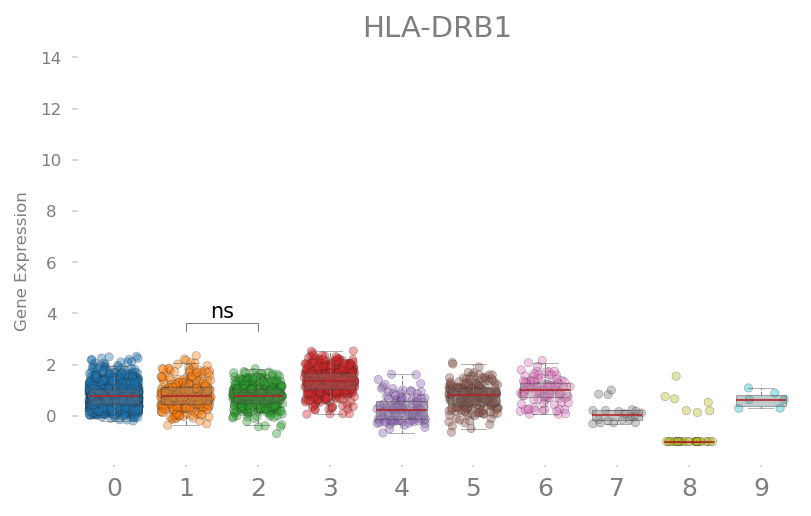

                      CD83 leiden_0.25  n_genes  n_genes_by_counts  \
CGCTATCTCCTTGGTC-11  1.671           0      479                479   
TGGCCAGTCCCAAGAT-14  1.787           0      716                716   
CGGACTGTCACCCGAG-14  1.833           0      521                521   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638    21.965  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.356e-02 U_stat=9.174e+03




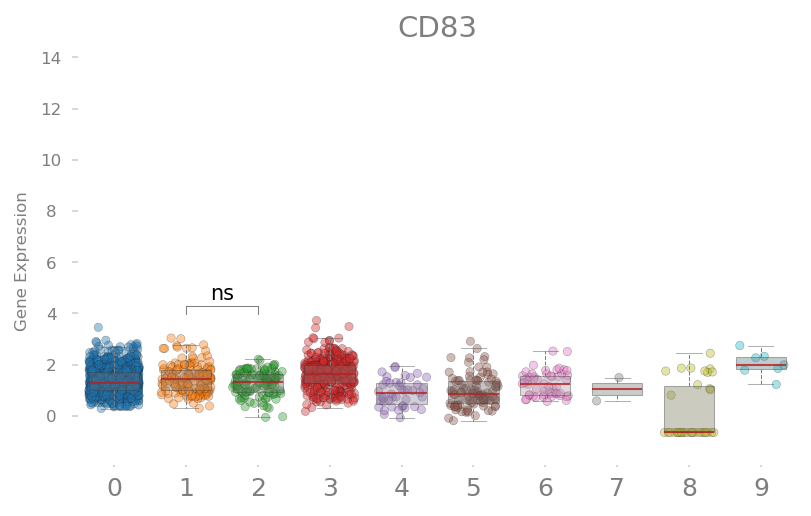

                      CD69 leiden_0.25  n_genes  n_genes_by_counts  \
TGGCCAGTCCCAAGAT-14  0.802           0      716                716   
CGGACTGTCACCCGAG-14  1.133           0      521                521   
TTTACTGTCACCATAG-13  1.659           1      356                356   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.607e-05 U_stat=4.208e+04




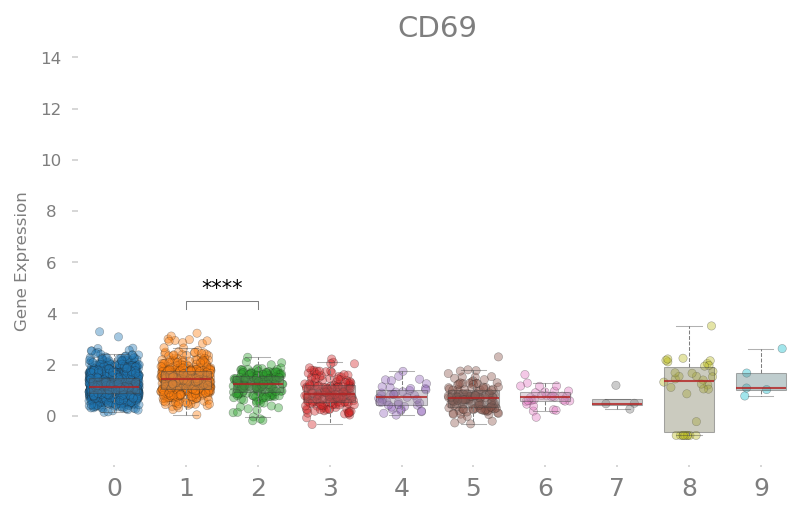

                       IGHM leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.369           8      424                424   
GGCTGGTTCATTGCGA-14   1.572           5     1619               1619   
GATCGATTCCTTGACC-14   2.915           0      737                737   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
GATCGATTCCTTGACC-14      1980.000           94.000    18.875    11.012  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.443e-01 U_stat=6.970e+02




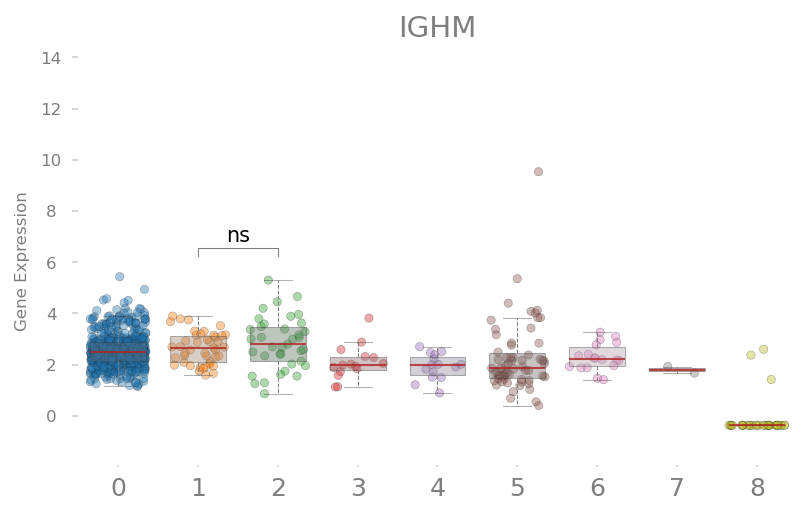

                     HLA-DRB5 leiden_0.25  n_genes  n_genes_by_counts  \
CGGACTGTCACCCGAG-14     1.832           0      521                521   
TACGGATGTATGAATG-14     1.417           0      726                726   
CGTAGGCTCAGCATGT-14    -0.522           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.064e-01 U_stat=4.256e+03




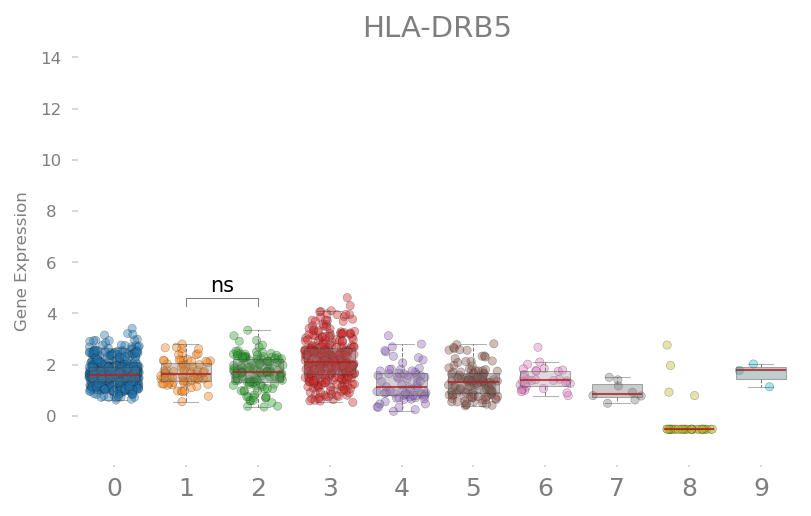

                      SRGN leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11  1.294           0      636                636   
CGGACTGTCACCCGAG-14  0.716           0      521                521   
TTTACTGTCACCATAG-13  1.608           1      356                356   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.719e-35 U_stat=2.082e+05




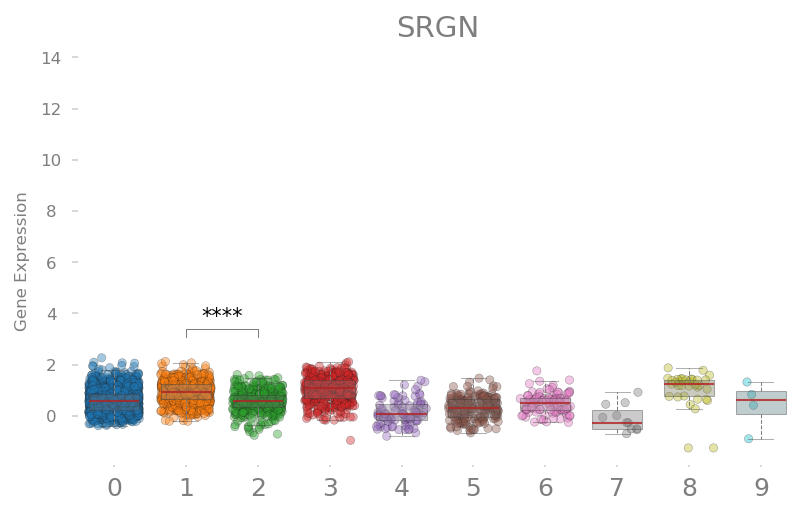

                       IL32 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.721           8      424                424   
ACACTGAGTCATACTG-15   1.715           2     2740               2740   
GGCTGGTTCATTGCGA-14   0.417           5     1619               1619   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.041e-15 U_stat=1.370e+05




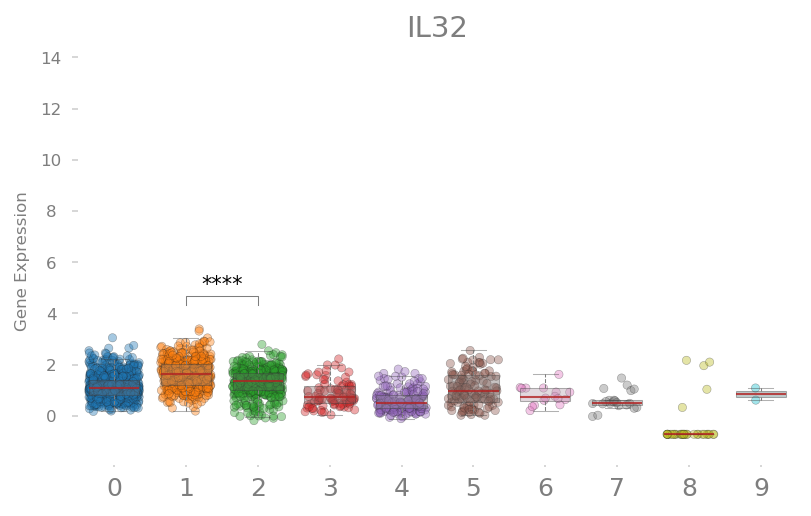

                     TNFRSF4 leiden_0.25  n_genes  n_genes_by_counts  \
TGGCCAGTCCCAAGAT-14    3.139           0      716                716   
CGGACTGTCACCCGAG-14    3.856           0      521                521   
CGTAGGCTCAGCATGT-14   -0.256           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.288e-01 U_stat=7.510e+02




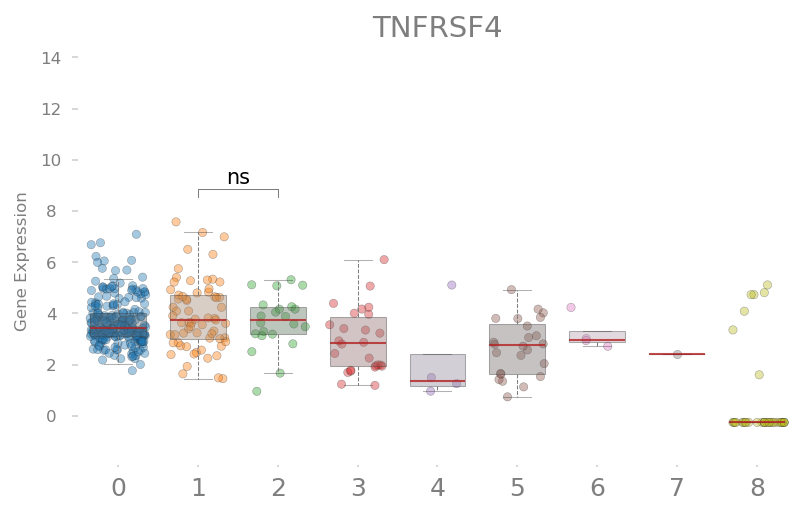

                      KLRB1 leiden_0.25  n_genes  n_genes_by_counts  \
TGGCCAGTCCCAAGAT-14   2.865           0      716                716   
CGGACTGTCACCCGAG-14   2.215           0      521                521   
CGTAGGCTCAGCATGT-14  -0.375           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.720e-04 U_stat=1.549e+04




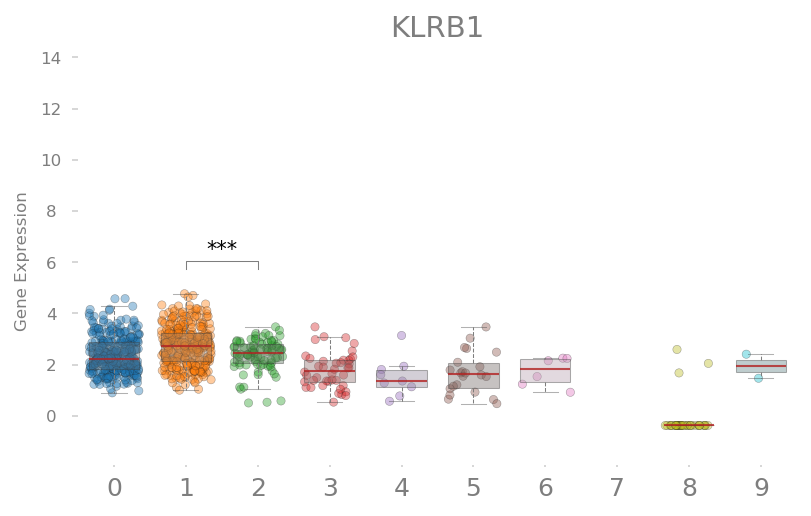

                     ZFP36 leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11  0.367           0      636                636   
CGCTATCTCCTTGGTC-11  0.100           0      479                479   
TGGCCAGTCCCAAGAT-14  0.983           0      716                716   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638    21.965  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.813e-21 U_stat=2.272e+05




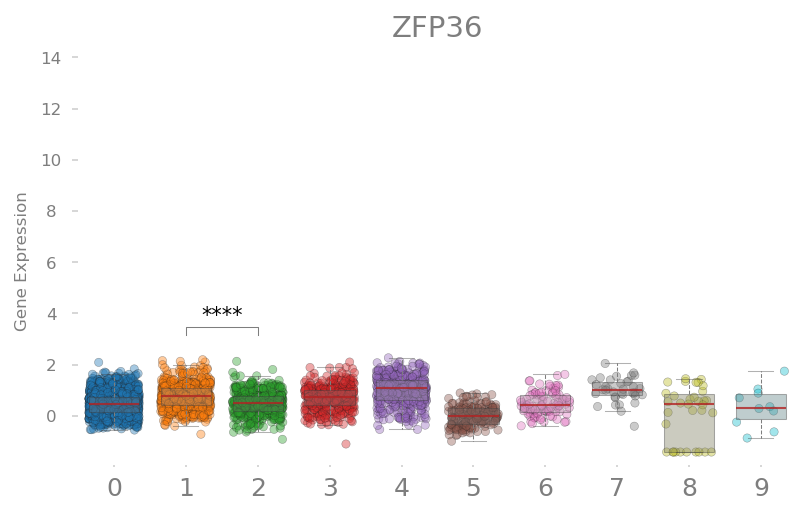

                       TFF1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.380           8      424                424   
GGCAATTAGGAGCGTT-15   2.008           2      468                468   
ACACTGAGTCATACTG-15   3.481           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.426e-15 U_stat=1.924e+03




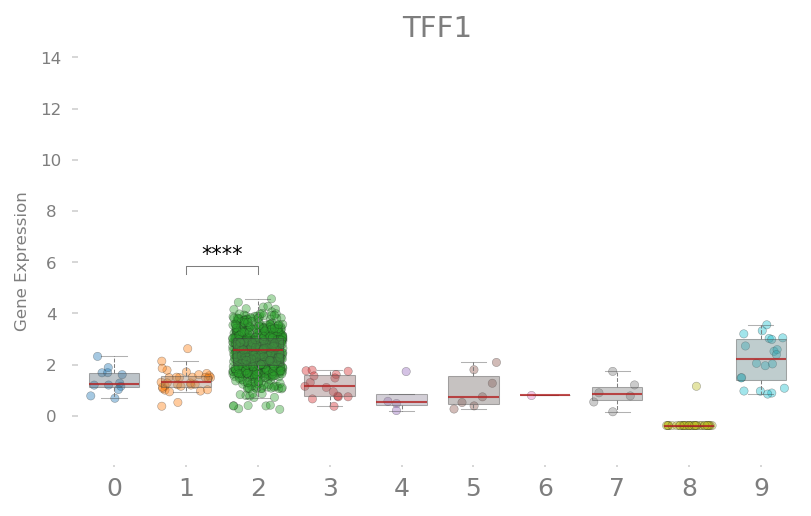

                     SPINK1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.349           8      424                424   
GGCAATTAGGAGCGTT-15   2.117           2      468                468   
ACACTGAGTCATACTG-15   0.277           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.002e-01 U_stat=1.322e+03




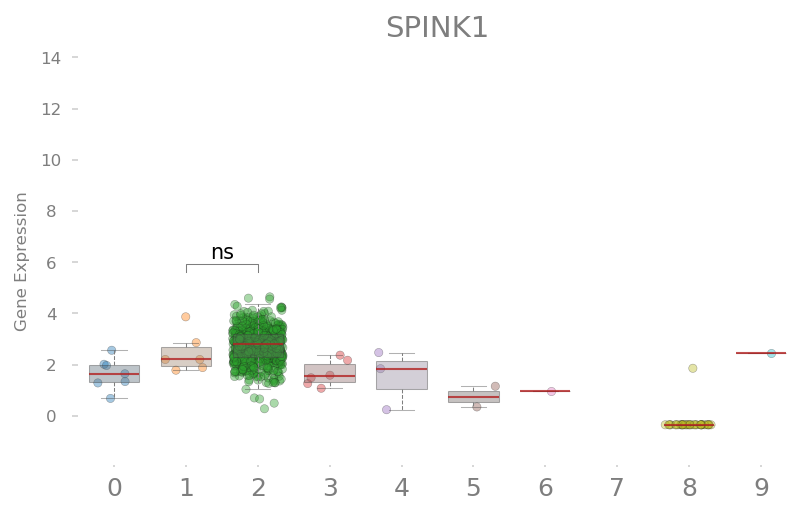

                        LYZ leiden_0.25  n_genes  n_genes_by_counts  \
CTGCTGTAGCCACGTC-1    3.936           2      593                593   
CGTAGGCTCAGCATGT-14  -0.460           8      424                424   
ACACTGAGTCATACTG-15   1.951           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.879e-03 U_stat=5.422e+03




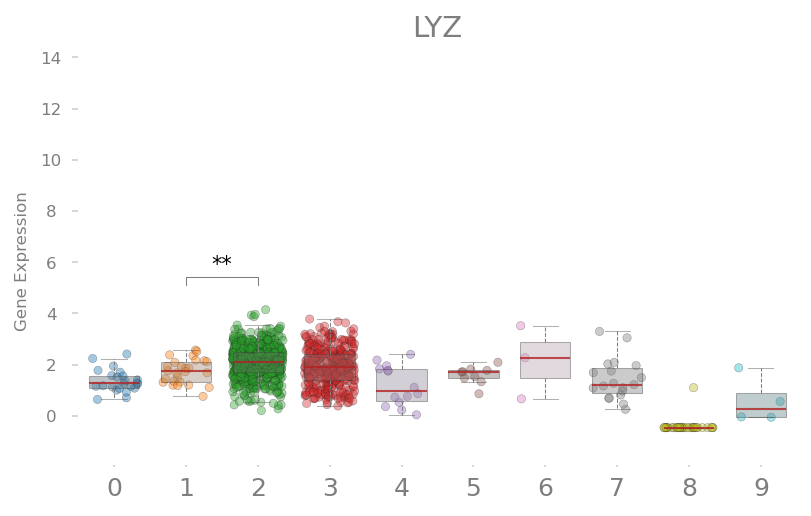

                      KRT19 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.383           8      424                424   
GGCAATTAGGAGCGTT-15   2.100           2      468                468   
ACACTGAGTCATACTG-15   3.356           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.470e-03 U_stat=3.000e+02




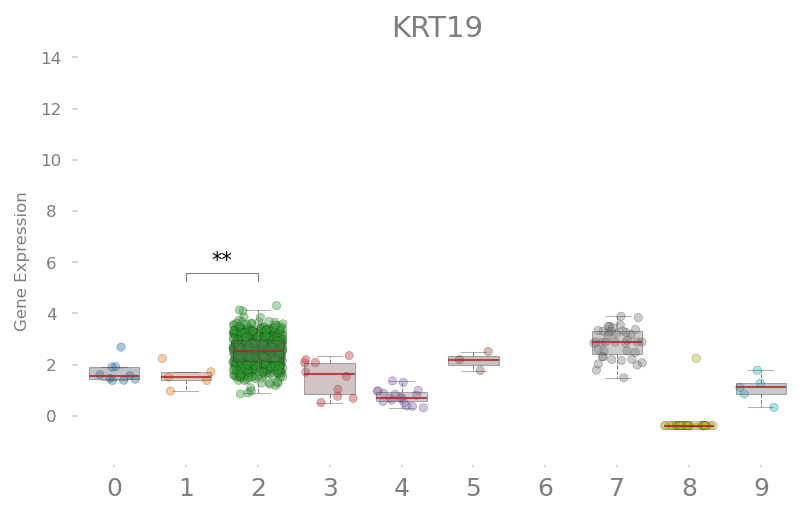

                      IFI27 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.386           8      424                424   
ACACTGAGTCATACTG-15   3.263           2     2740               2740   
TCCCGATAGTTAACGA-15   3.528           2      308                308   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
TCCCGATAGTTAACGA-15       438.000           62.000    10.244   -13.287  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.448e-01 U_stat=4.136e+03




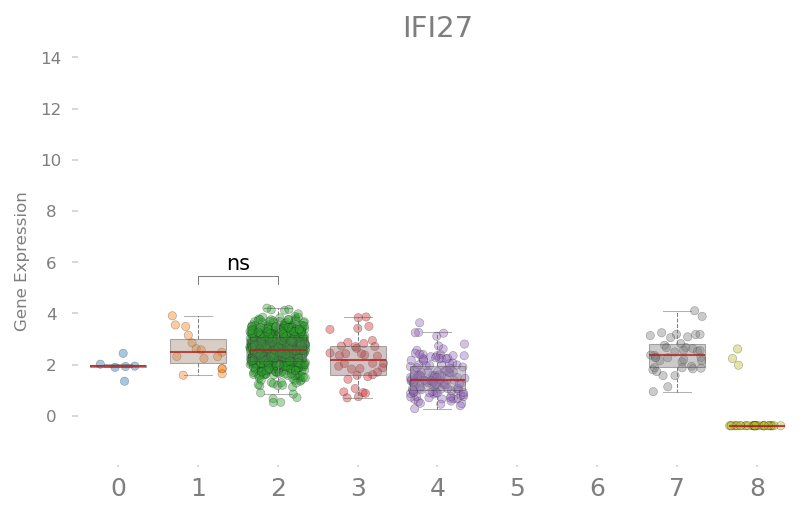

                      IFI30 leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11   1.334           0      636                636   
TACGGATGTATGAATG-14   1.910           0      726                726   
CGTAGGCTCAGCATGT-14  -0.441           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.760e-02 U_stat=3.732e+03




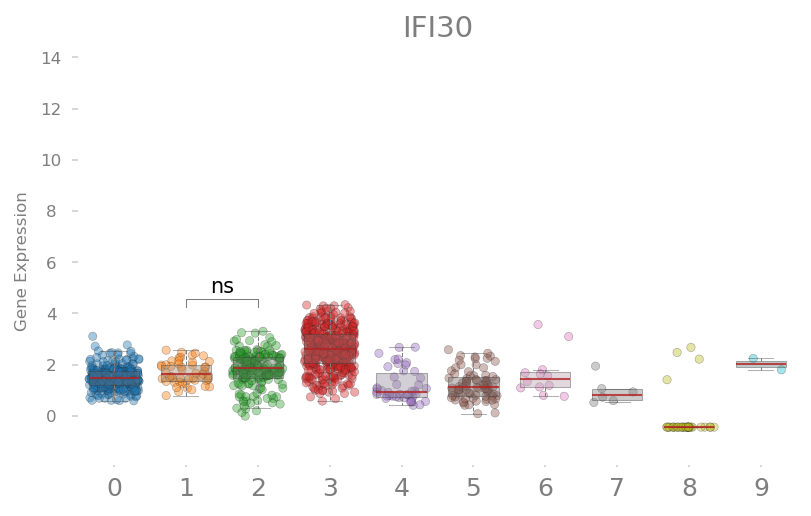

                     TYROBP leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.387           8      424                424   
ACACTGAGTCATACTG-15   0.304           2     2740               2740   
AGGGATGCAGACGCAA-16   3.151           3     1090               1090   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
AGGGATGCAGACGCAA-16      2379.000           78.000   -10.763    20.659  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.855e-04 U_stat=8.156e+03




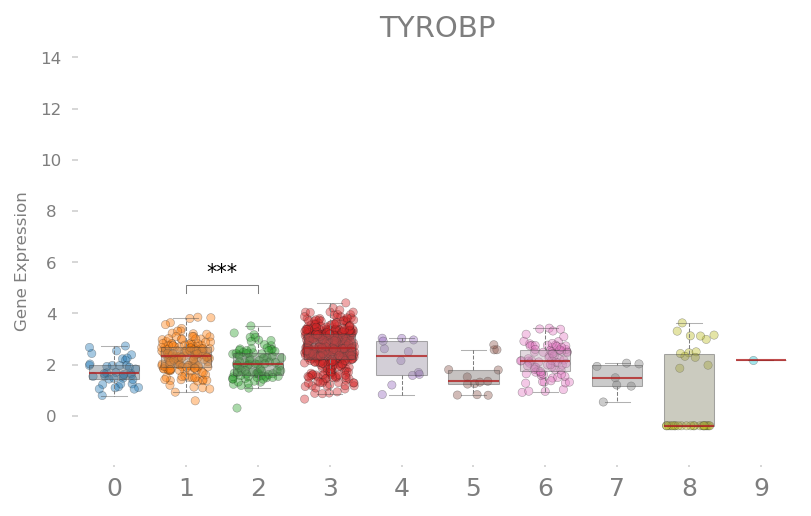

                     HLA-DRB1 leiden_0.25  n_genes  n_genes_by_counts  \
CGCTATCTCCTTGGTC-11     1.233           0      479                479   
TGGCCAGTCCCAAGAT-14     0.249           0      716                716   
CGGACTGTCACCCGAG-14     1.182           0      521                521   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638    21.965  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.640e-01 U_stat=5.696e+04




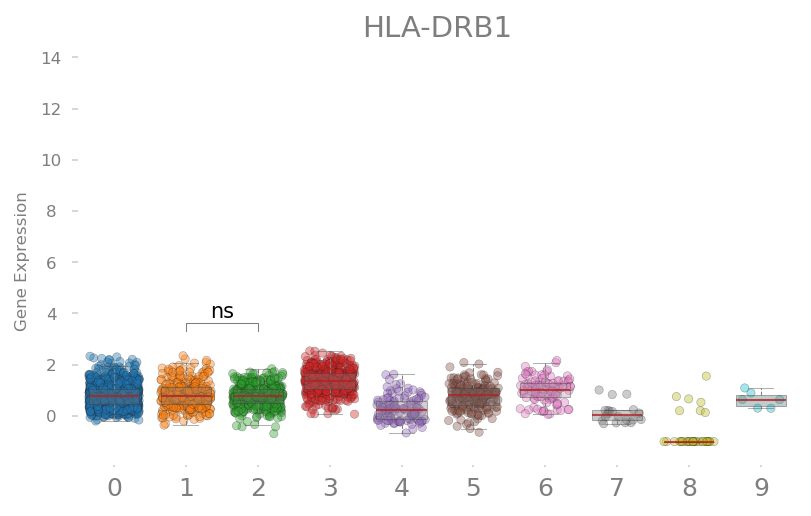

                       IL1B leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.295           8      424                424   
AGGGATGCAGACGCAA-16   2.511           3     1090               1090   
GACGTGCTCGTAGGAG-7    3.866           3      417                417   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
AGGGATGCAGACGCAA-16      2379.000           78.000   -10.763    20.659  
GACGTGCTCGTAGGAG-7        638.000           31.000    -8.704     9.797  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.366e-01 U_stat=3.110e+02




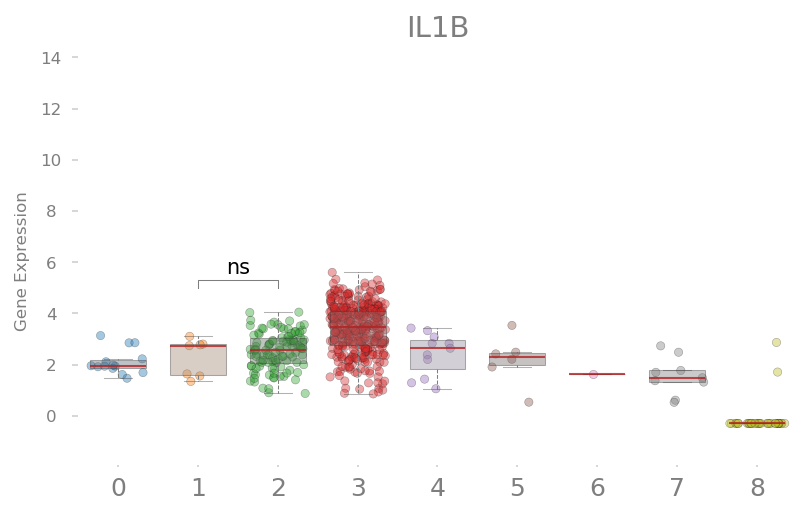

                     FCER1G leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.349           8      424                424   
ACACTGAGTCATACTG-15   0.460           2     2740               2740   
AGGGATGCAGACGCAA-16   3.014           3     1090               1090   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
AGGGATGCAGACGCAA-16      2379.000           78.000   -10.763    20.659  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.279e-01 U_stat=5.036e+03




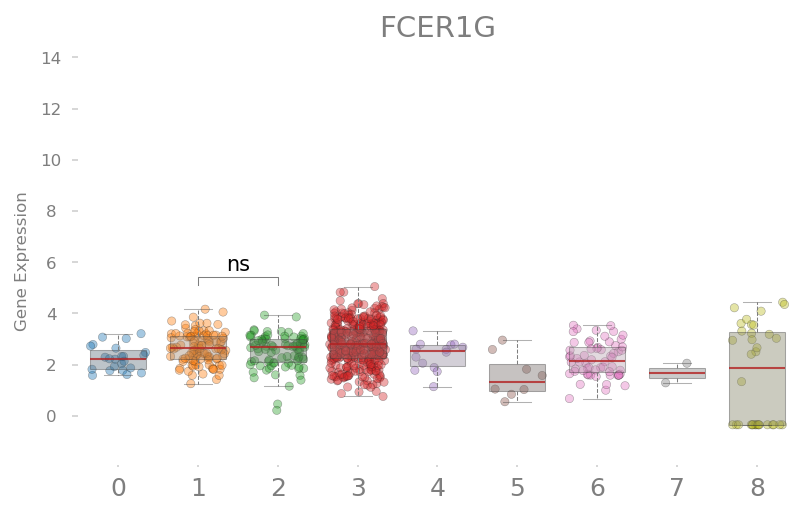

                      SPARC leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.288           8      424                424   
ACGGGCTCATATGCTG-16   3.344           4     1998               1998   
CATGACAAGACTTTCG-16   3.118           4      306                306   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACGGGCTCATATGCTG-16      5260.000          168.000   -27.206     4.828  
CATGACAAGACTTTCG-16       427.000           21.000   -23.083     9.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.349e-03 U_stat=7.200e+01




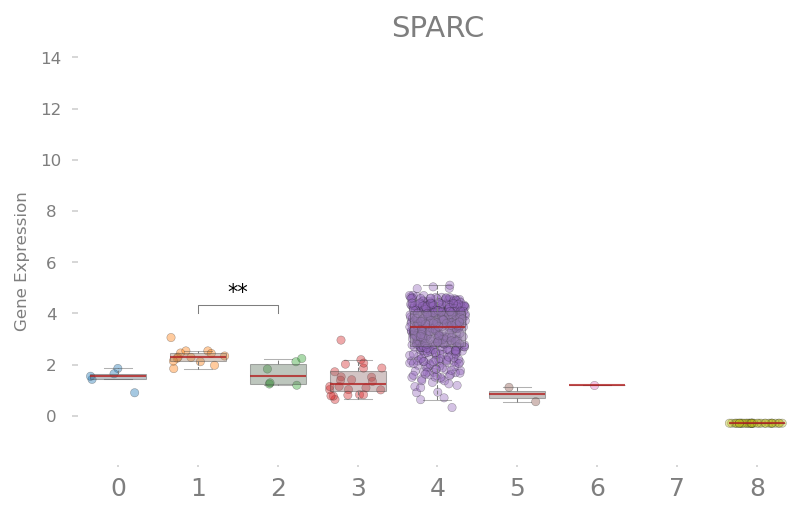

                     COL1A1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.291           8      424                424   
CGTGAGCAGCTGCCCA-15   1.712           1      515                515   
ACGGGCTCATATGCTG-16   3.736           4     1998               1998   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
CGTGAGCAGCTGCCCA-15       869.000           48.000     6.364     3.593  
ACGGGCTCATATGCTG-16      5260.000          168.000   -27.206     4.828  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.289e-03 U_stat=1.670e+02




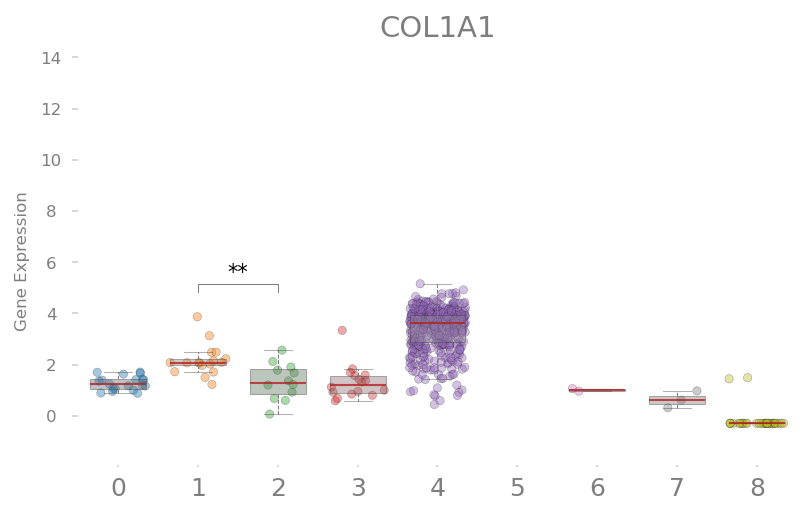

                     COL3A1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.293           8      424                424   
CGTGAGCAGCTGCCCA-15   1.831           1      515                515   
GTAGTCAAGAGCTGCA-16   0.196           2     3156               3156   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
CGTGAGCAGCTGCCCA-15       869.000           48.000     6.364     3.593  
GTAGTCAAGAGCTGCA-16     12669.000          935.000    -2.985   -15.873  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.563e-02 U_stat=2.840e+02




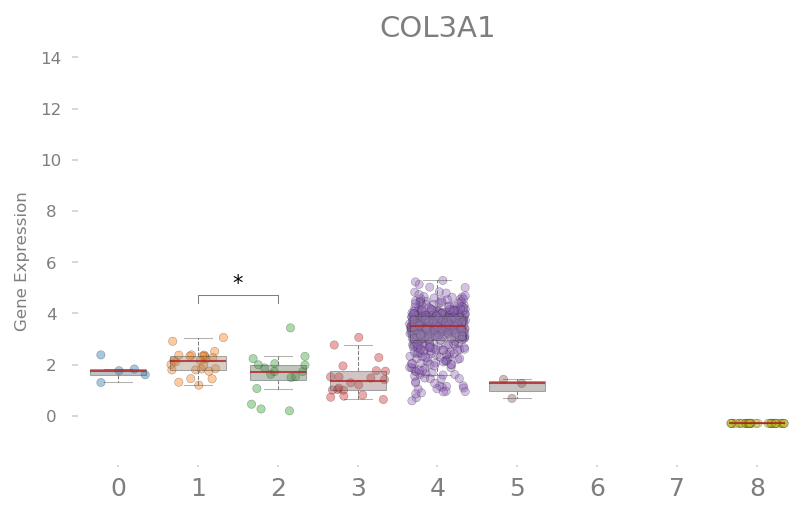

                     COL1A2 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.295           8      424                424   
GTAGTCAAGAGCTGCA-16   0.199           2     3156               3156   
ACGGGCTCATATGCTG-16   3.181           4     1998               1998   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GTAGTCAAGAGCTGCA-16     12669.000          935.000    -2.985   -15.873  
ACGGGCTCATATGCTG-16      5260.000          168.000   -27.206     4.828  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.388e-01 U_stat=1.590e+02




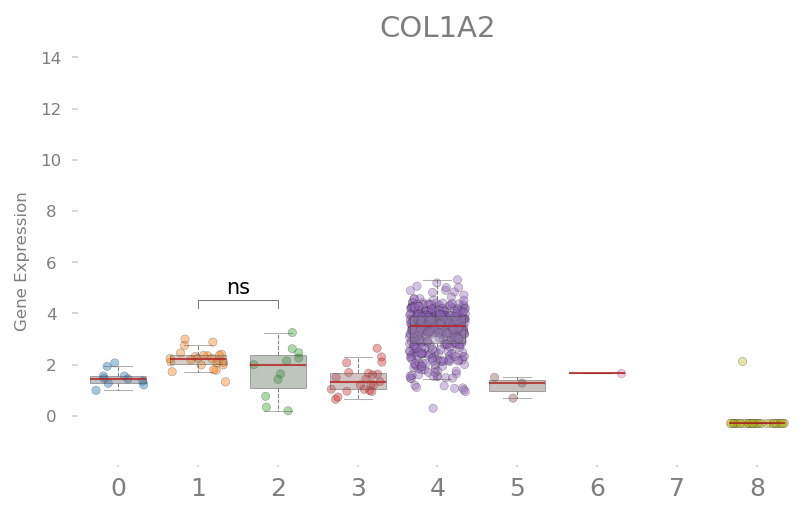

                        LUM leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.279           8      424                424   
ACGGGCTCATATGCTG-16   4.501           4     1998               1998   
CATGACAAGACTTTCG-16   3.826           4      306                306   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACGGGCTCATATGCTG-16      5260.000          168.000   -27.206     4.828  
CATGACAAGACTTTCG-16       427.000           21.000   -23.083     9.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.000e-01 U_stat=0.000e+00




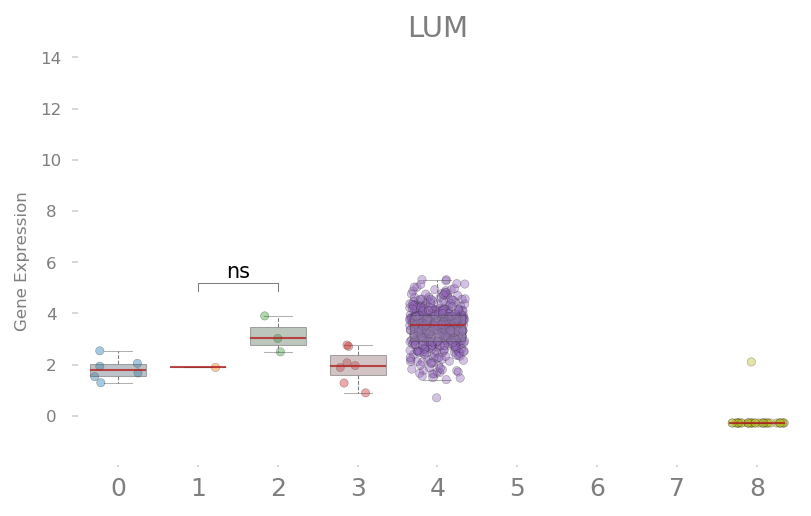

                       CCL5 leiden_0.25  n_genes  n_genes_by_counts  \
TTTACTGTCACCATAG-13   2.588           1      356                356   
CGTAGGCTCAGCATGT-14  -0.528           8      424                424   
AGGGATGCAGACGCAA-16   1.191           3     1090               1090   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
AGGGATGCAGACGCAA-16      2379.000           78.000   -10.763    20.659  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.279e-36 U_stat=1.498e+05




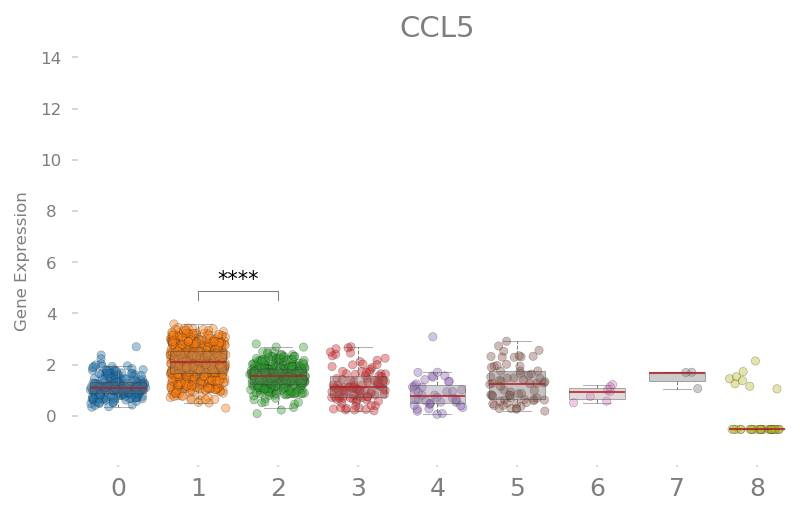

                       NKG7 leiden_0.25  n_genes  n_genes_by_counts  \
TTTACTGTCACCATAG-13   2.631           1      356                356   
CGTAGGCTCAGCATGT-14  -0.389           8      424                424   
CGTGAGCAGCTGCCCA-15   2.813           1      515                515   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
CGTGAGCAGCTGCCCA-15       869.000           48.000     6.364     3.593  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.946e-13 U_stat=4.605e+04




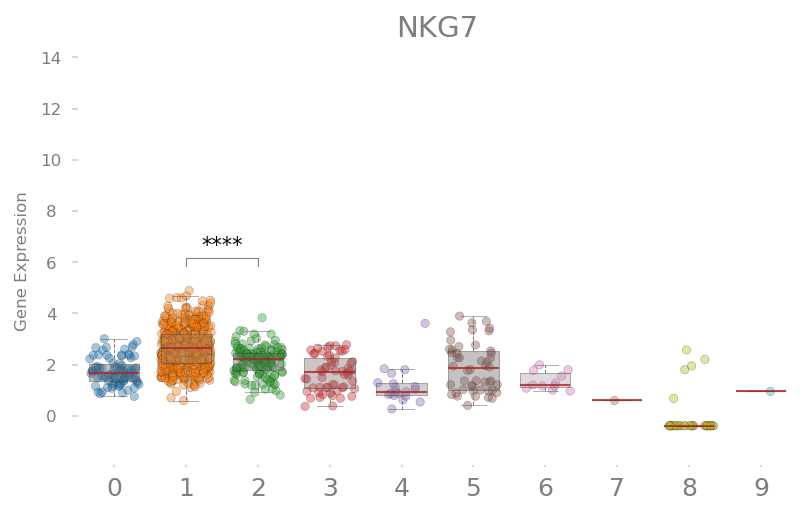

                       GZMA leiden_0.25  n_genes  n_genes_by_counts  \
TTTACTGTCACCATAG-13   3.830           1      356                356   
CGTAGGCTCAGCATGT-14  -0.346           8      424                424   
GGCTGGTTCATTGCGA-14   0.730           5     1619               1619   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.124e-11 U_stat=3.608e+04




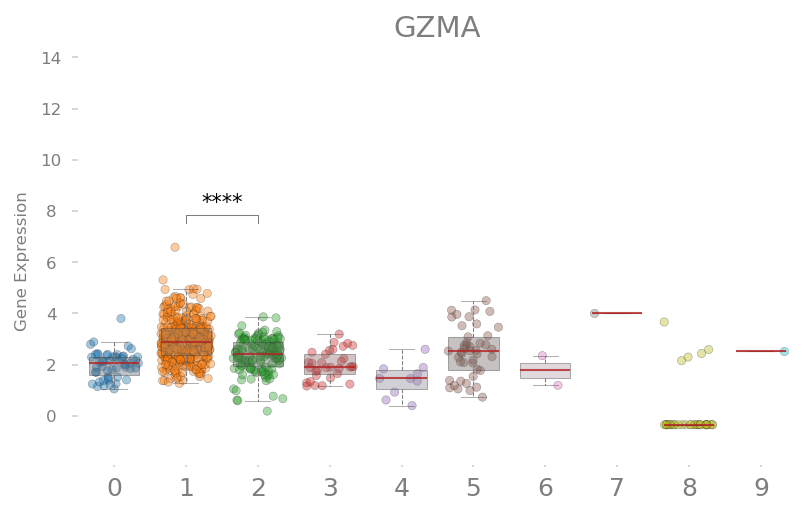

                       CST7 leiden_0.25  n_genes  n_genes_by_counts  \
TTTACTGTCACCATAG-13   3.473           1      356                356   
CGTAGGCTCAGCATGT-14  -0.424           8      424                424   
GGCTGGTTCATTGCGA-14   0.581           5     1619               1619   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.932e-06 U_stat=3.756e+04




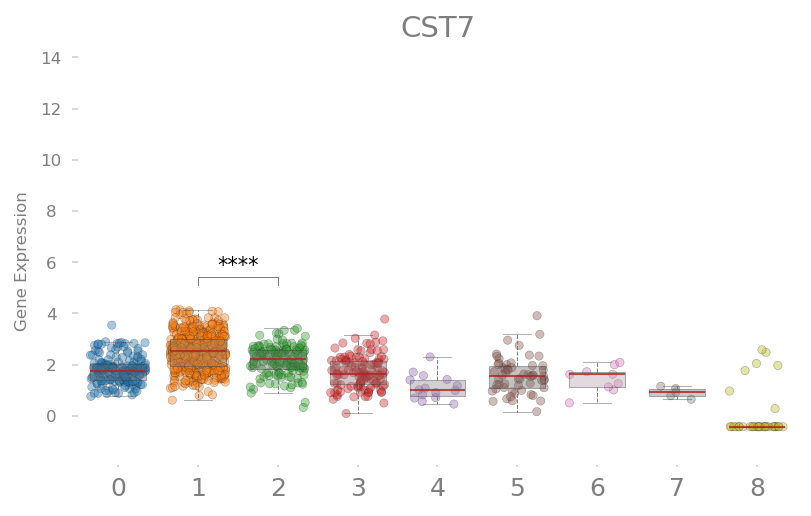

                      SRGN leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11  1.294           0      636                636   
CGGACTGTCACCCGAG-14  0.716           0      521                521   
TTTACTGTCACCATAG-13  1.608           1      356                356   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.719e-35 U_stat=2.082e+05




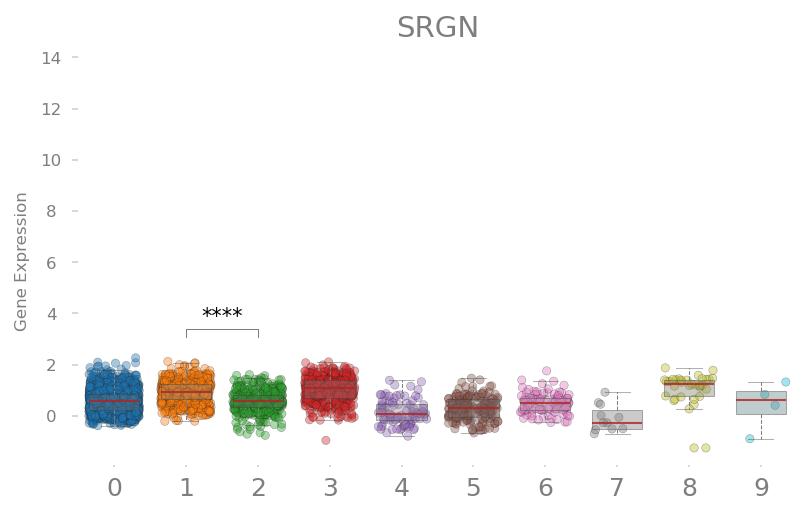

                     MT-ND6 leiden_0.25  n_genes  n_genes_by_counts  \
CTGCTGTAGCCACGTC-1    1.770           2      593                593   
CGTAGGCTCAGCATGT-14  -0.835           8      424                424   
ACACTGAGTCATACTG-15   0.465           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.218e-02 U_stat=1.402e+05




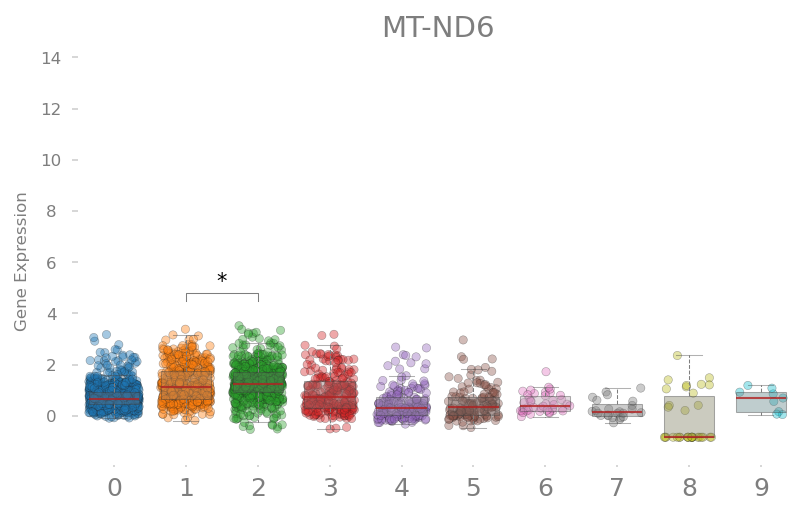

                      MYH9 leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11  1.111           0      636                636   
CTGCTGTAGCCACGTC-1   1.682           2      593                593   
CGTAGGCTCAGCATGT-14  1.562           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.447e-14 U_stat=7.235e+04




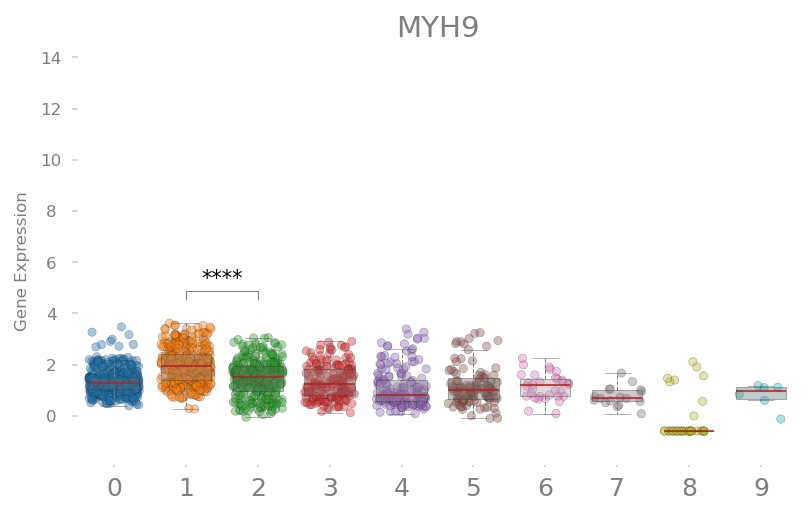

                       LCP1 leiden_0.25  n_genes  n_genes_by_counts  \
TTTACTGTCACCATAG-13   2.172           1      356                356   
CGTAGGCTCAGCATGT-14  -0.570           8      424                424   
ACACTGAGTCATACTG-15   0.434           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.909e-07 U_stat=3.015e+04




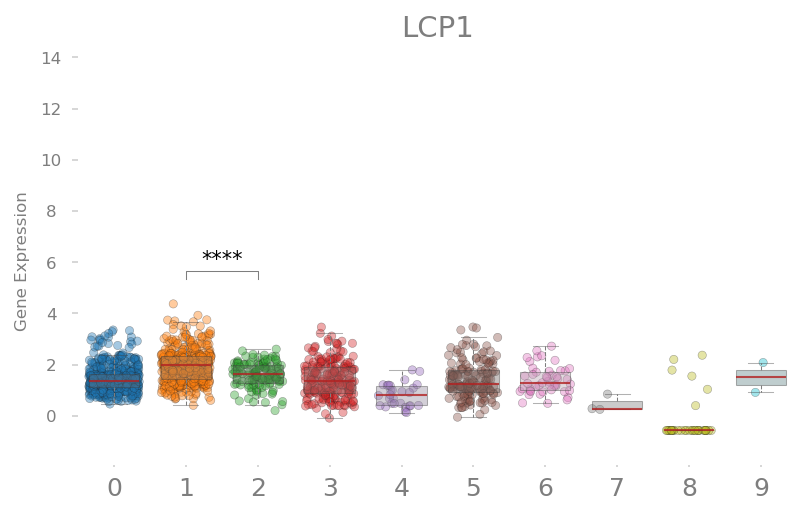

                       UBC leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11  0.369           0      636                636   
TGGCCAGTCCCAAGAT-14  0.659           0      716                716   
CGGACTGTCACCCGAG-14  0.224           0      521                521   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.280e-10 U_stat=2.782e+05




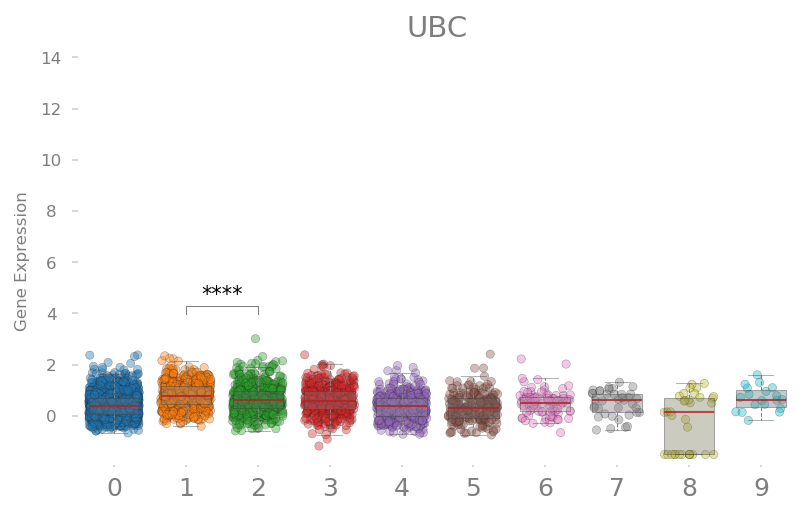

                      MACF1 leiden_0.25  n_genes  n_genes_by_counts  \
CGCTATCTCCTTGGTC-11   2.757           0      479                479   
CTGCTGTAGCCACGTC-1    2.500           2      593                593   
CGTAGGCTCAGCATGT-14  -0.423           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638    21.965  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.267e-10 U_stat=2.679e+04




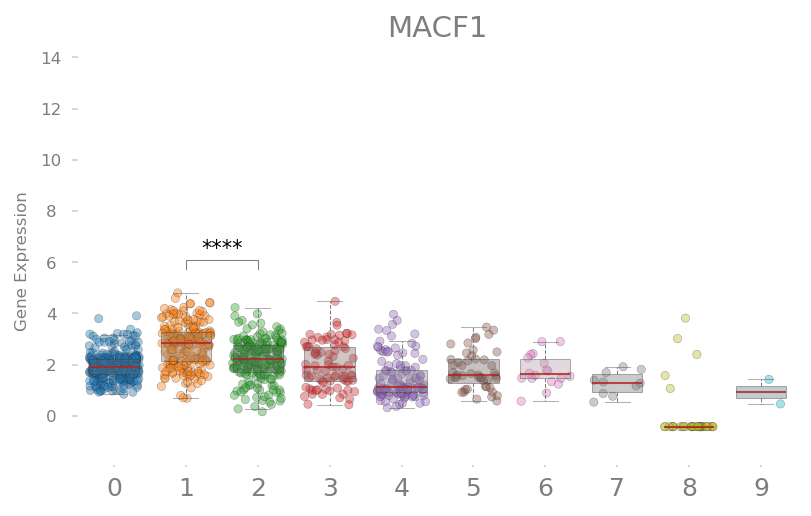

                       KRT8 leiden_0.25  n_genes  n_genes_by_counts  \
CTGCTGTAGCCACGTC-1    2.161           2      593                593   
CGTAGGCTCAGCATGT-14  -0.363           8      424                424   
GGCAATTAGGAGCGTT-15   2.317           2      468                468   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.289e-02 U_stat=2.793e+03




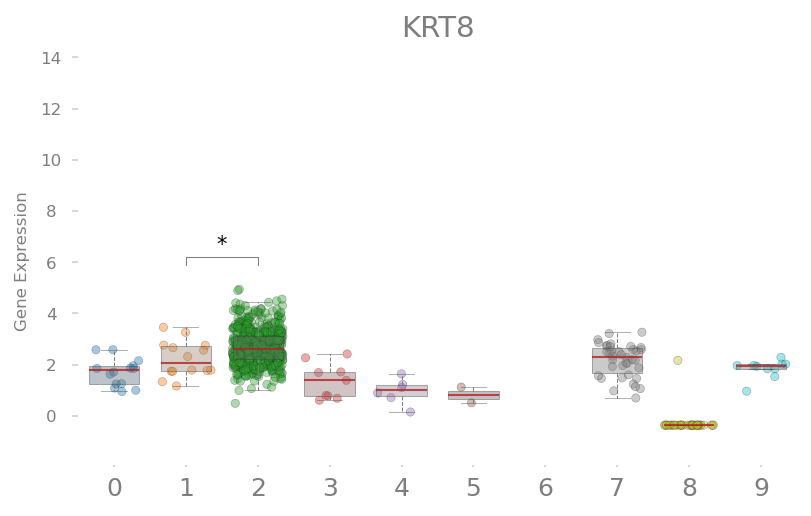

                      KRT19 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.383           8      424                424   
GGCAATTAGGAGCGTT-15   2.100           2      468                468   
ACACTGAGTCATACTG-15   3.356           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.470e-03 U_stat=3.000e+02




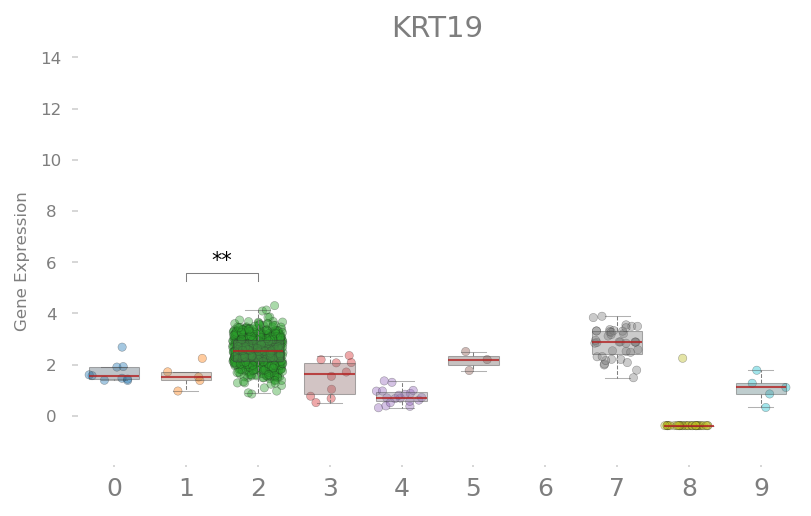

                       ELF3 leiden_0.25  n_genes  n_genes_by_counts  \
CTGCTGTAGCCACGTC-1    3.247           2      593                593   
CGTAGGCTCAGCATGT-14  -0.288           8      424                424   
ACACTGAGTCATACTG-15   0.664           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.395e-01 U_stat=7.675e+02




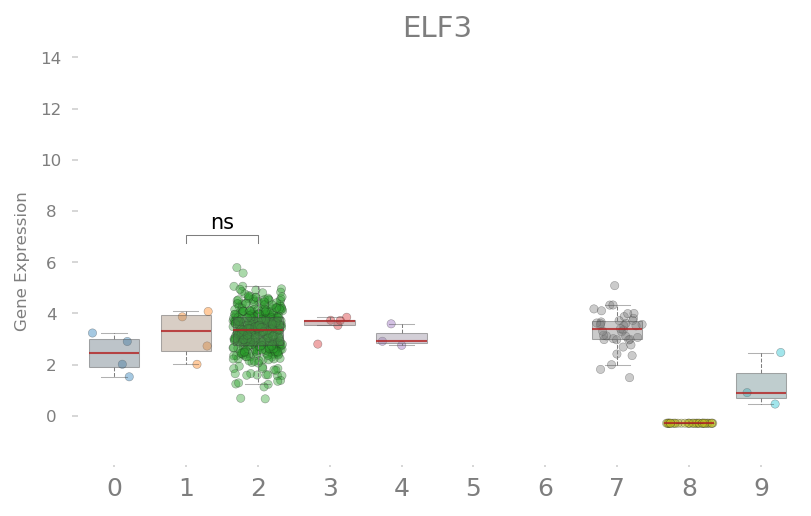

                     NEAT1 leiden_0.25  n_genes  n_genes_by_counts  \
TACGGATGTATGAATG-14  0.450           0      726                726   
CTGCTGTAGCCACGTC-1   1.744           2      593                593   
CGTAGGCTCAGCATGT-14  0.780           8      424                424   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.172e-37 U_stat=6.361e+04




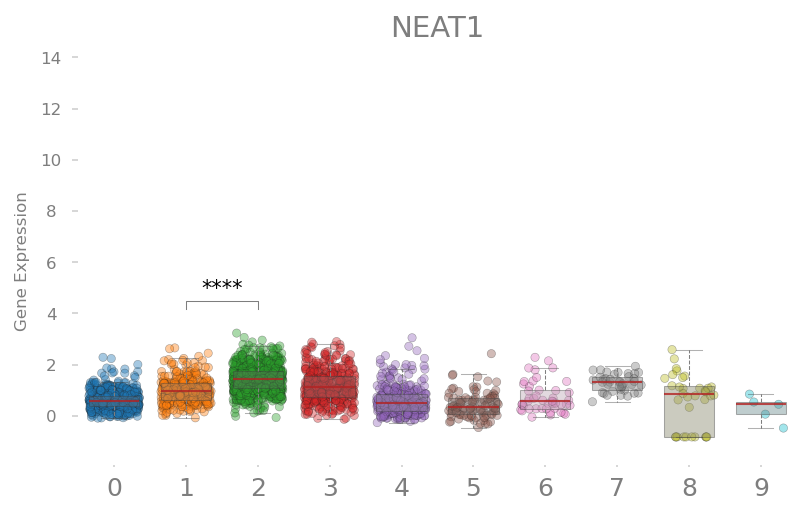

                      KRT18 leiden_0.25  n_genes  n_genes_by_counts  \
CTGCTGTAGCCACGTC-1    2.290           2      593                593   
CGTAGGCTCAGCATGT-14  -0.362           8      424                424   
ACACTGAGTCATACTG-15   3.608           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.237e-01 U_stat=2.422e+03




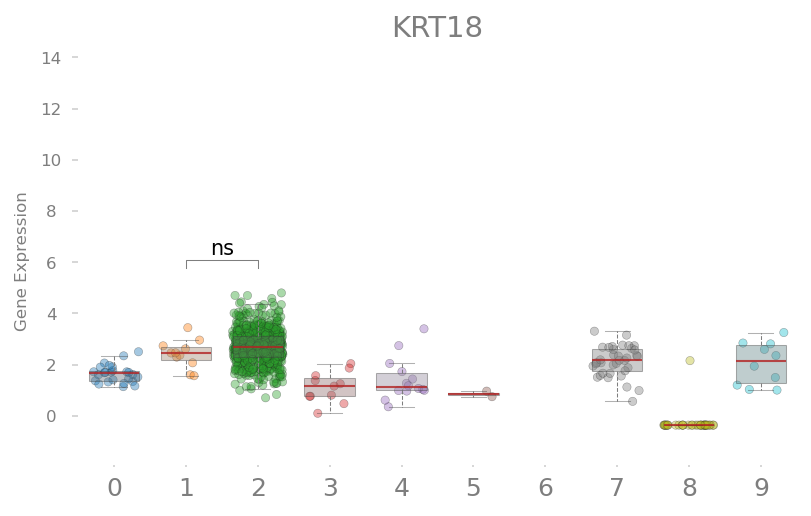

                     HSPA1B leiden_0.25  n_genes  n_genes_by_counts  \
TACGGATGTATGAATG-14   2.492           0      726                726   
CGTAGGCTCAGCATGT-14  -0.373           8      424                424   
GTAGTCAAGAGCTGCA-16   0.691           2     3156               3156   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GTAGTCAAGAGCTGCA-16     12669.000          935.000    -2.985   -15.873  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.416e-08 U_stat=9.648e+03




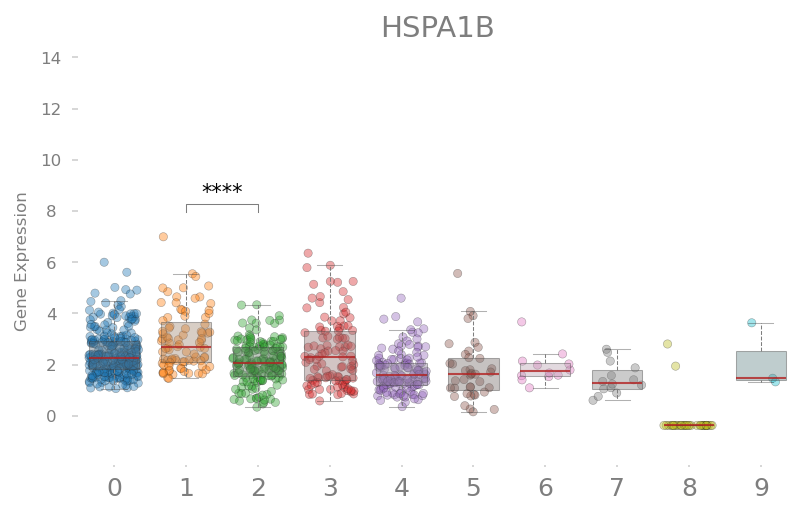

                     HSPA1A leiden_0.25  n_genes  n_genes_by_counts  \
TACGGATGTATGAATG-14   2.511           0      726                726   
CGTAGGCTCAGCATGT-14  -0.436           8      424                424   
ACACTGAGTCATACTG-15   0.201           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.183e-11 U_stat=1.577e+04




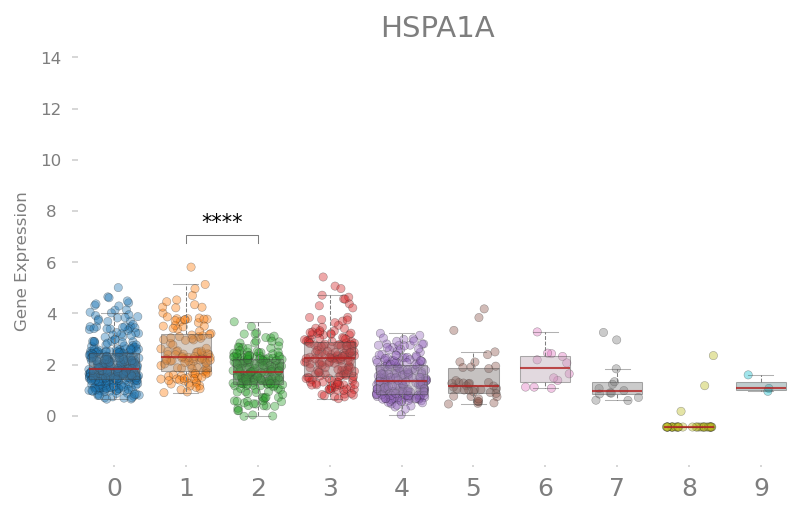

                     DNAJB1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11   0.805           0      636                636   
TACGGATGTATGAATG-14   1.834           0      726                726   
TTTACTGTCACCATAG-13   1.668           1      356                356   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.086e-12 U_stat=6.676e+04




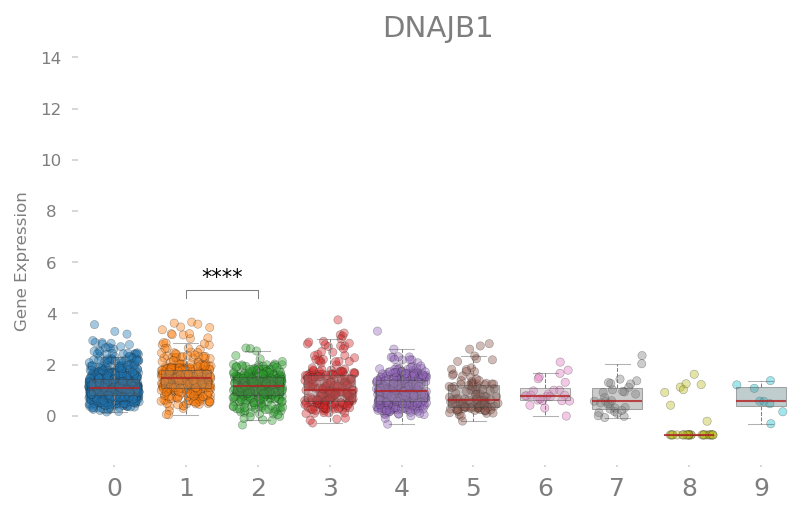

                     HSP90AA1 leiden_0.25  n_genes  n_genes_by_counts  \
CGCTATCTCCTTGGTC-11     0.386           0      479                479   
TGGCCAGTCCCAAGAT-14     0.949           0      716                716   
TACGGATGTATGAATG-14     0.219           0      726                726   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638    21.965  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.180e-01 U_stat=1.787e+05




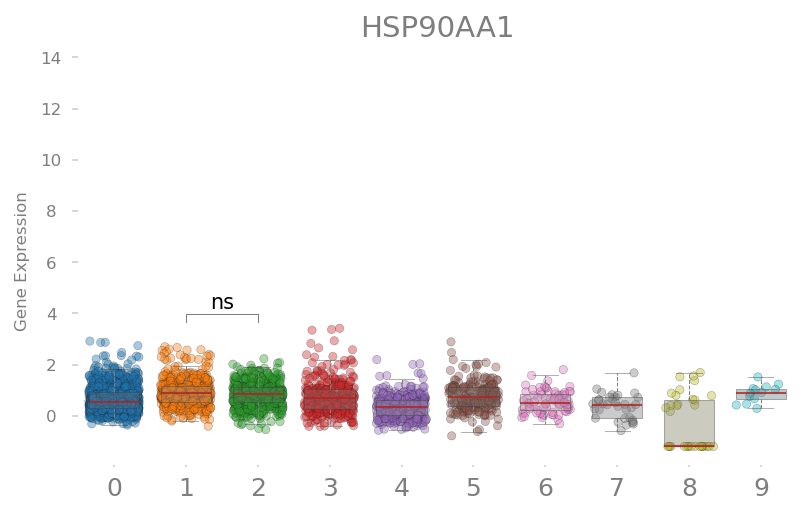

                      CD69 leiden_0.25  n_genes  n_genes_by_counts  \
TGGCCAGTCCCAAGAT-14  0.802           0      716                716   
CGGACTGTCACCCGAG-14  1.133           0      521                521   
TTTACTGTCACCATAG-13  1.659           1      356                356   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
TGGCCAGTCCCAAGAT-14      1682.000           83.000    28.100     8.627  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
TTTACTGTCACCATAG-13       525.000           48.000     4.974     4.110  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.607e-05 U_stat=4.208e+04




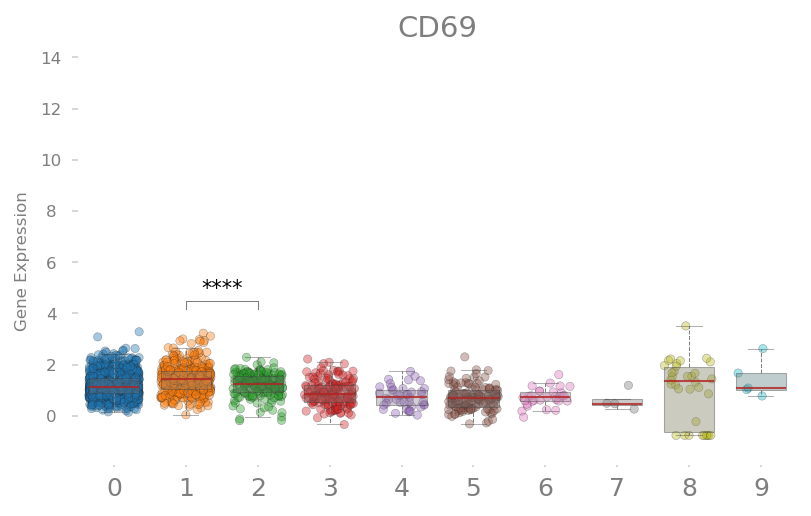

                      STMN1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.367           8      424                424   
AGGGATGCAGACGCAA-16   1.674           3     1090               1090   
GCTTGAACAATACGCT-15   2.873           2      482                482   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
AGGGATGCAGACGCAA-16      2379.000           78.000   -10.763    20.659  
GCTTGAACAATACGCT-15       787.000          153.000    10.956    -7.733  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.509e-01 U_stat=6.064e+03




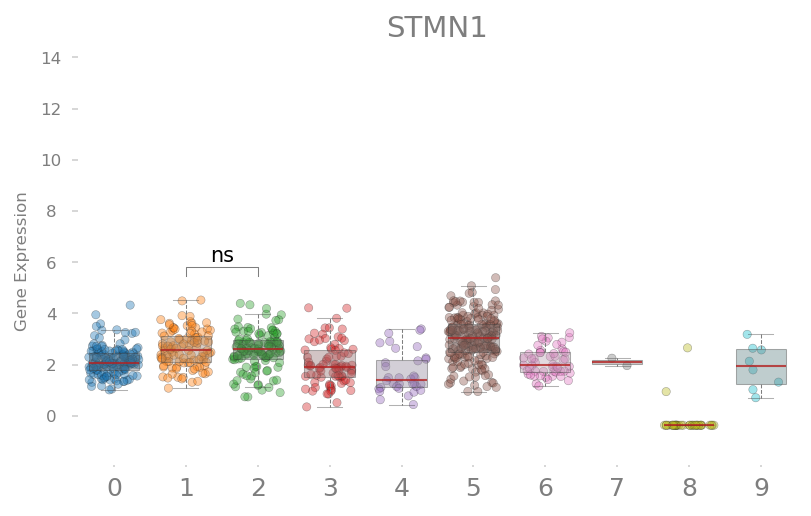

                      GAPDH leiden_0.25  n_genes  n_genes_by_counts  \
CGTCAGGGTAAATGAC-11   0.897           0      636                636   
CGGACTGTCACCCGAG-14   0.875           0      521                521   
TACGGATGTATGAATG-14  -0.147           0      726                726   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTCAGGGTAAATGAC-11      1706.000          120.000    28.320     3.670  
CGGACTGTCACCCGAG-14      1058.000           85.000    20.571    23.702  
TACGGATGTATGAATG-14      1691.000           40.000    11.484    18.019  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.130e-04 U_stat=2.120e+05




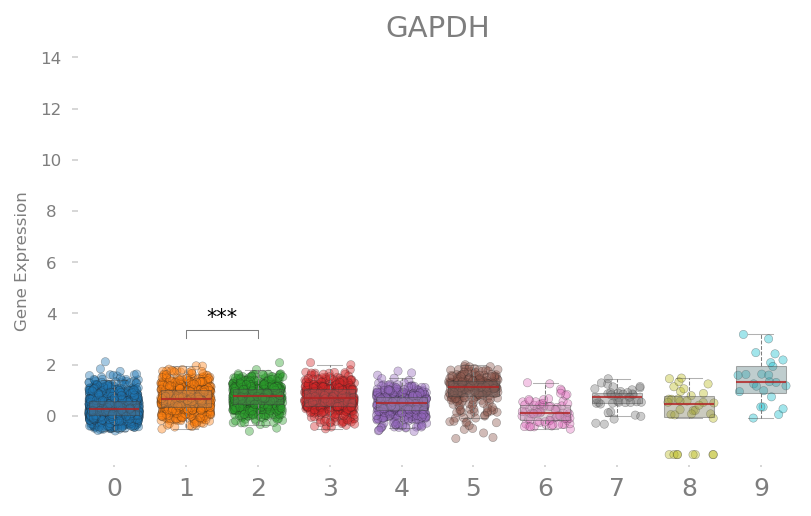

                     HIST1H4C leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14    -0.537           8      424                424   
GGCTGGTTCATTGCGA-14     0.400           5     1619               1619   
GTAGTCAAGAGCTGCA-16     0.402           2     3156               3156   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
GTAGTCAAGAGCTGCA-16     12669.000          935.000    -2.985   -15.873  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.056e-01 U_stat=1.254e+04




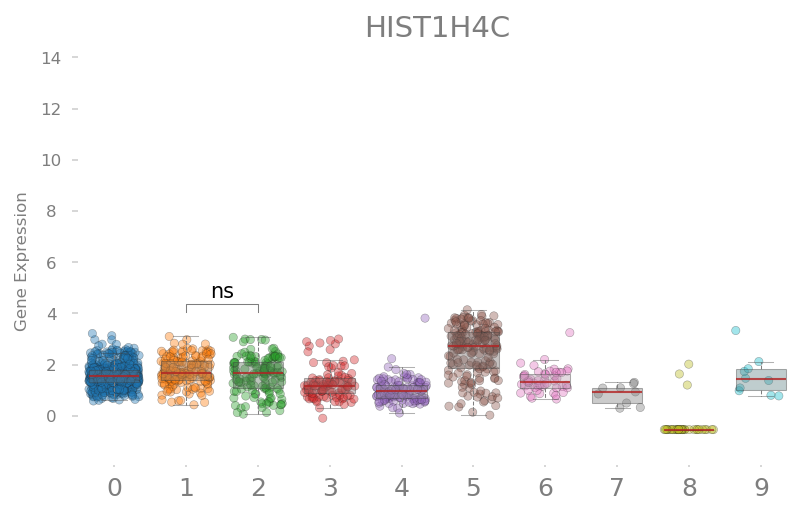

                       RRM2 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.168           8      424                424   
GCTTGAACAATACGCT-15   6.821           2      482                482   
TCAGCTCGTTCAGCGC-14   4.264           5     1867               1867   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GCTTGAACAATACGCT-15       787.000          153.000    10.956    -7.733  
TCAGCTCGTTCAGCGC-14      4696.000          127.000    -1.746    26.367  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.698e-01 U_stat=1.800e+01




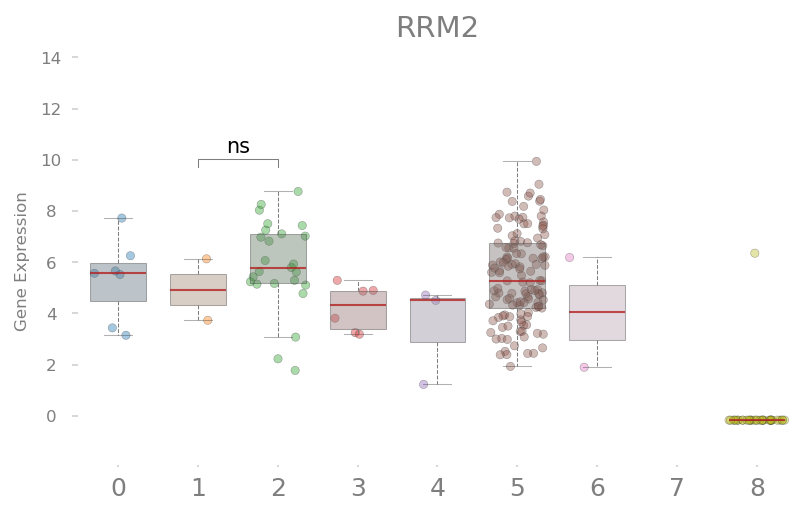

                       TYMS leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.181           8      424                424   
TCAGCTCGTTCAGCGC-14   5.749           5     1867               1867   
ACAGCCGCAAGAGGCT-12   6.083           5     1563               1563   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
TCAGCTCGTTCAGCGC-14      4696.000          127.000    -1.746    26.367  
ACAGCCGCAAGAGGCT-12      4079.000           71.000    -0.732    25.501  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:4.752e-01 U_stat=2.690e+02




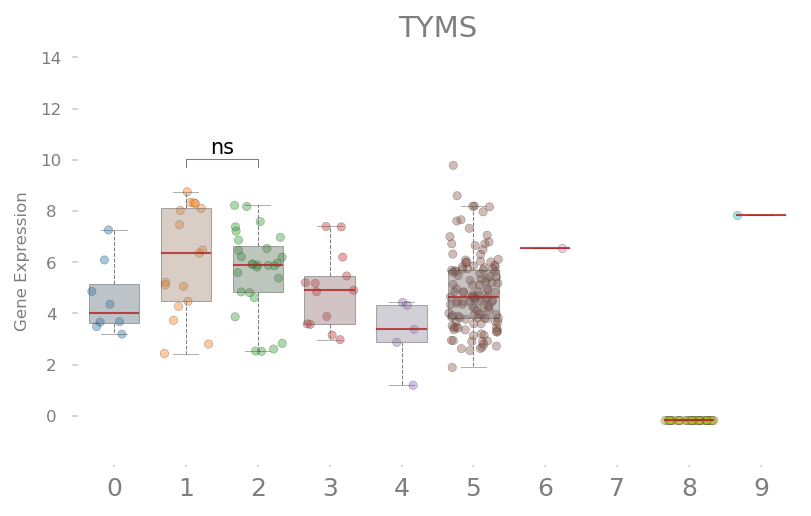

                       GZMB leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.302           8      424                424   
GGCAATTAGGAGCGTT-15   2.899           2      468                468   
CGTGAGCAGCTGCCCA-15   2.660           1      515                515   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
CGTGAGCAGCTGCCCA-15       869.000           48.000     6.364     3.593  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.332e-09 U_stat=1.658e+04




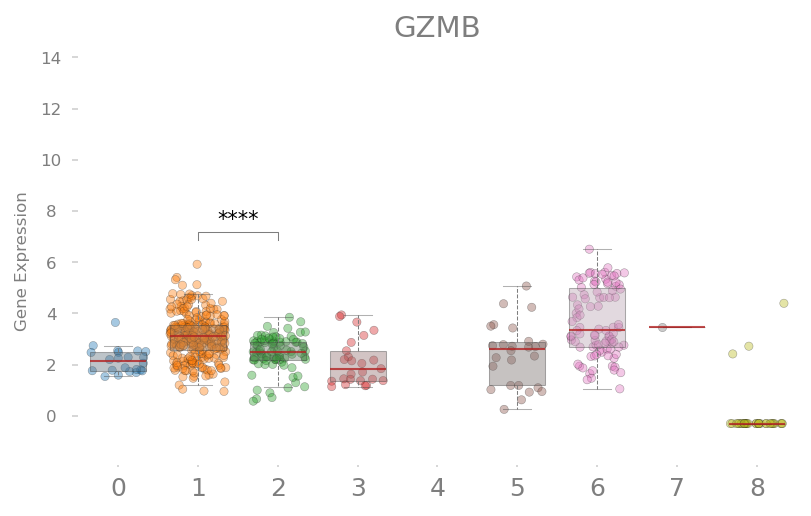

                     JCHAIN leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.285           8      424                424   
GGCTGGTTCATTGCGA-14   6.131           5     1619               1619   
TCAGCTCGTTCAGCGC-14   4.359           5     1867               1867   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
TCAGCTCGTTCAGCGC-14      4696.000          127.000    -1.746    26.367  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.661e-05 U_stat=1.330e+02




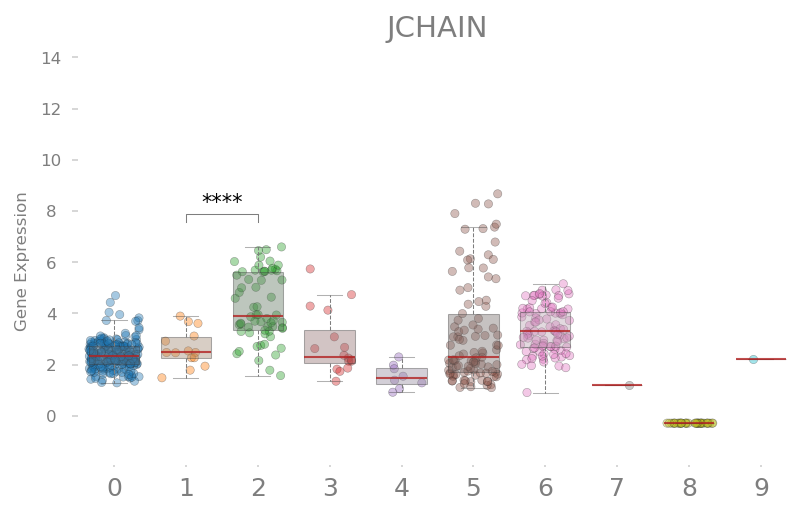

                      SOX4 leiden_0.25  n_genes  n_genes_by_counts  \
CTGCTGTAGCCACGTC-1   3.617           2      593                593   
CGTAGGCTCAGCATGT-14  3.410           8      424                424   
GCCTCTAAGATCACGG-1   3.672           1      565                565   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CTGCTGTAGCCACGTC-1        828.000           45.000    -1.232   -14.311  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GCCTCTAAGATCACGG-1        796.000           26.000    29.991    31.787  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.553e-01 U_stat=3.011e+03




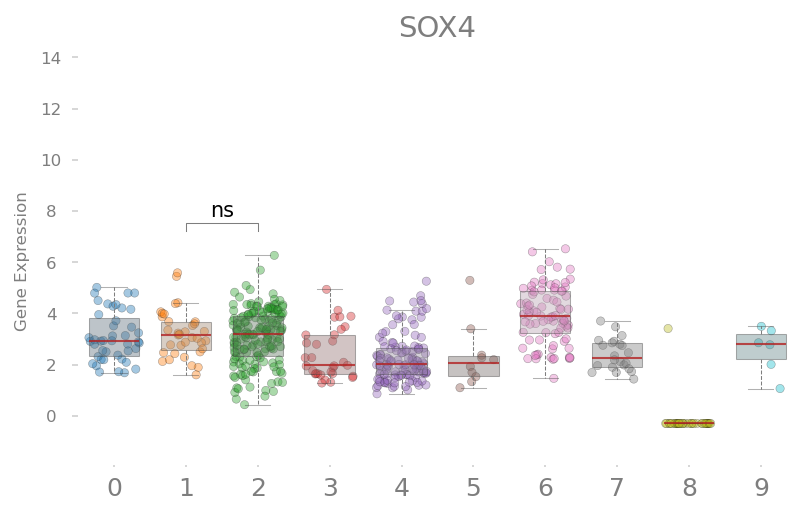

                       IRF7 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.289           8      424                424   
CAGCTAAAGAGCTGGT-14   3.279           0      586                586   
GTAGTCAAGAGCTGCA-16   0.690           2     3156               3156   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
CAGCTAAAGAGCTGGT-14      1363.000           65.000    28.498    19.403  
GTAGTCAAGAGCTGCA-16     12669.000          935.000    -2.985   -15.873  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.894e-06 U_stat=2.542e+03




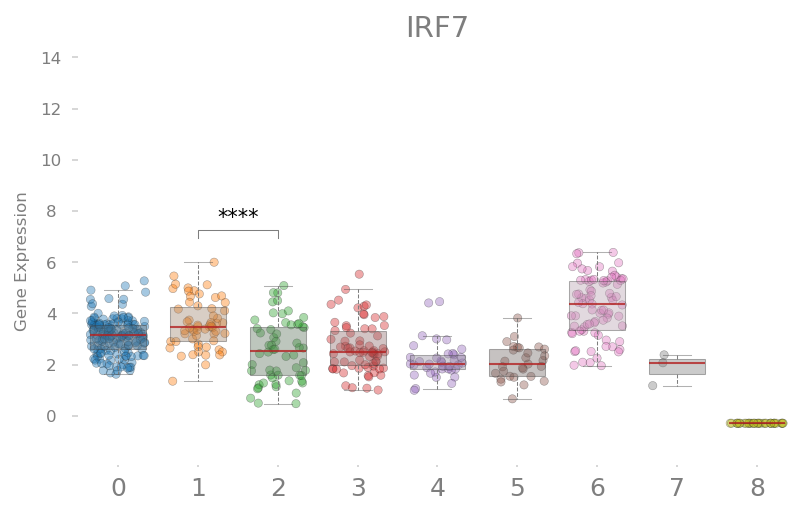

                     TYROBP leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.387           8      424                424   
ACACTGAGTCATACTG-15   0.304           2     2740               2740   
AGGGATGCAGACGCAA-16   3.151           3     1090               1090   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
AGGGATGCAGACGCAA-16      2379.000           78.000   -10.763    20.659  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:8.855e-04 U_stat=8.156e+03




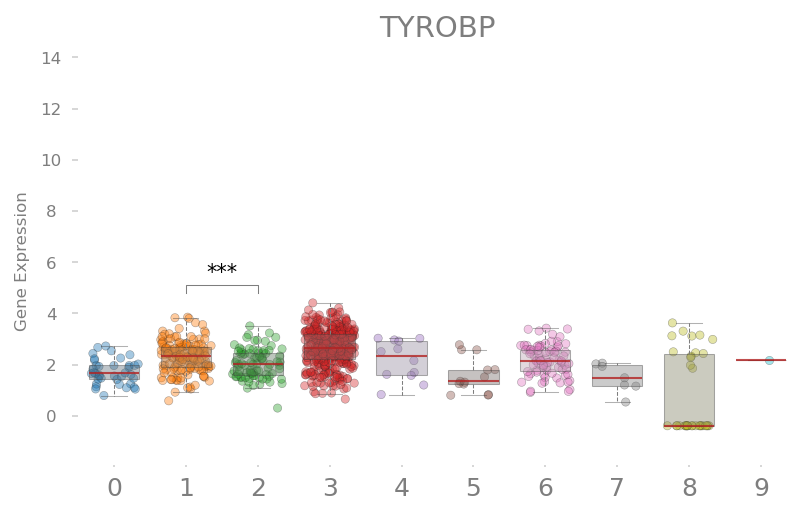

                     JCHAIN leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.285           8      424                424   
GGCTGGTTCATTGCGA-14   6.131           5     1619               1619   
TCAGCTCGTTCAGCGC-14   4.359           5     1867               1867   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
TCAGCTCGTTCAGCGC-14      4696.000          127.000    -1.746    26.367  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.661e-05 U_stat=1.330e+02




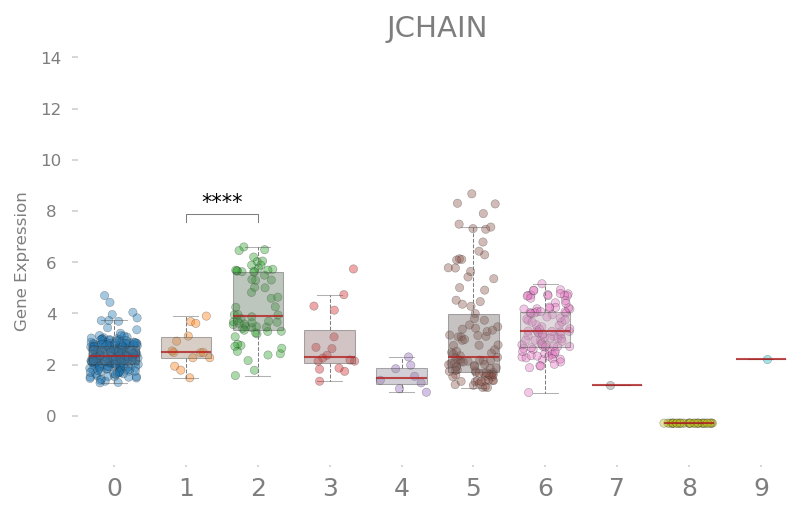

                       IGKC leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.256           8      424                424   
GTAGGCCTCTCACATT-14   2.982           0      679                679   
TCAGCTCGTTCAGCGC-14   7.245           5     1867               1867   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GTAGGCCTCTCACATT-14      1531.000          135.000    18.823    23.251  
TCAGCTCGTTCAGCGC-14      4696.000          127.000    -1.746    26.367  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.934e-02 U_stat=2.625e+02




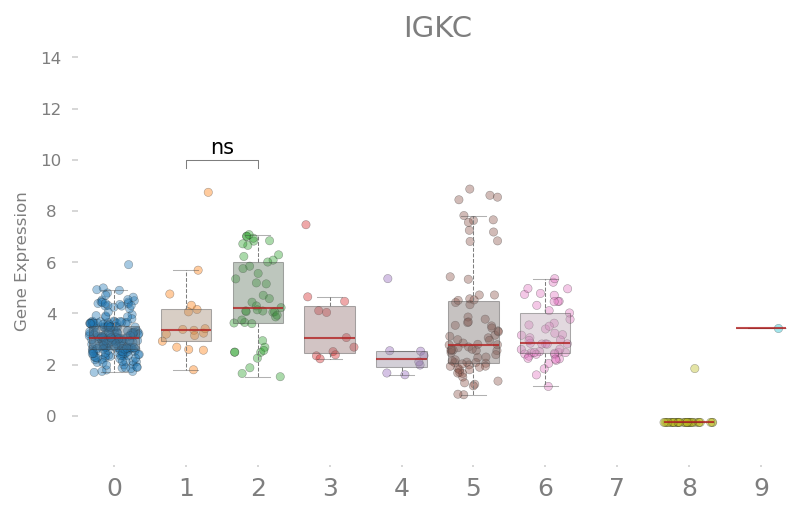

                      IGHA1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.175           8      424                424   
GCTGCAGGTGCTTCTC-14   3.316           0      701                701   
CTGCCTAAGACAAGCC-14   3.022           5      816                816   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GCTGCAGGTGCTTCTC-14      1906.000          120.000    26.602    15.611  
CTGCCTAAGACAAGCC-14      2298.000          117.000    21.999    -8.606  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:6.034e-05 U_stat=1.720e+02




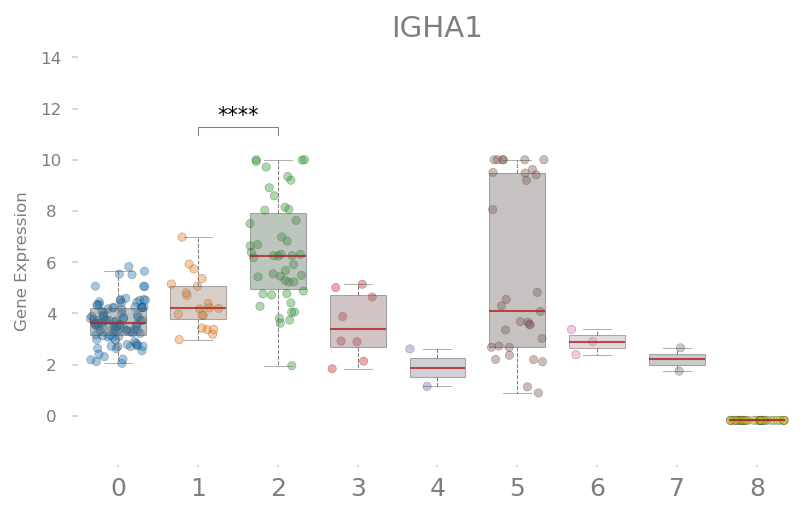

                       TFF1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.380           8      424                424   
GGCAATTAGGAGCGTT-15   2.008           2      468                468   
ACACTGAGTCATACTG-15   3.481           2     2740               2740   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.426e-15 U_stat=1.924e+03




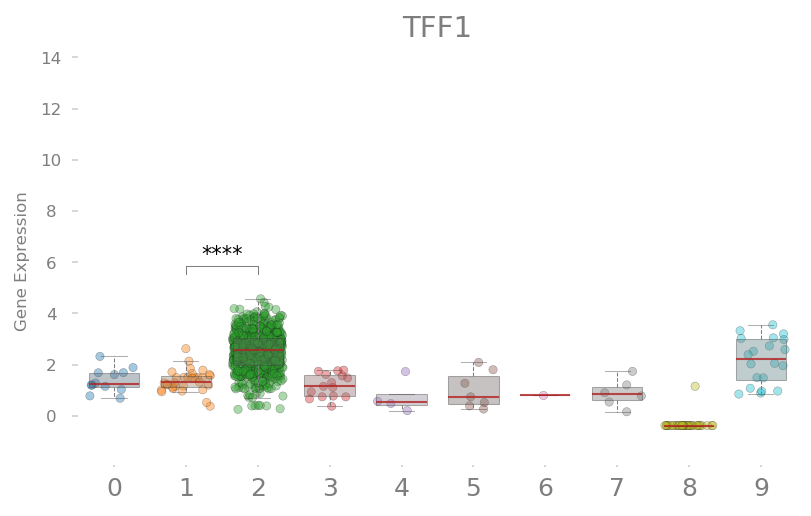

                       MZB1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.187           8      424                424   
GGCTGGTTCATTGCGA-14   6.130           5     1619               1619   
TCAGCTCGTTCAGCGC-14   5.757           5     1867               1867   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCTGGTTCATTGCGA-14      6355.000          287.000    22.132    -7.987  
TCAGCTCGTTCAGCGC-14      4696.000          127.000    -1.746    26.367  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:7.637e-01 U_stat=6.350e+01




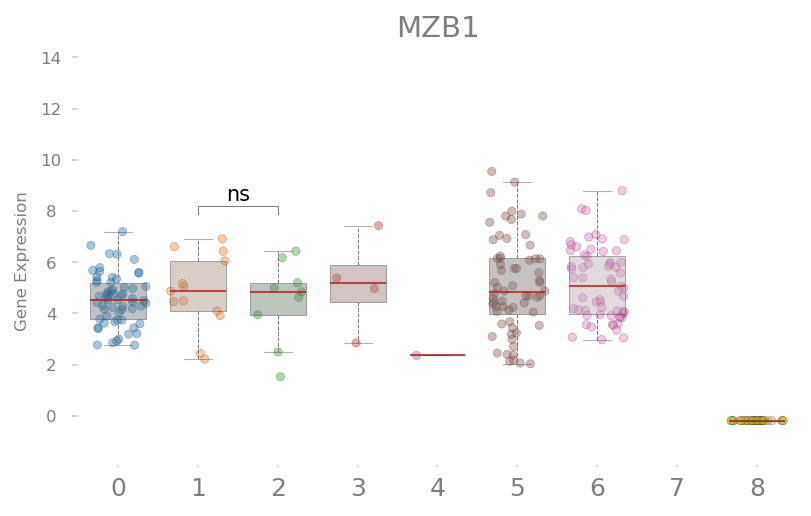

                     TPSAB1 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14   7.604           8      424                424   
ACACTGAGTCATACTG-15   4.997           2     2740               2740   
TCAGGTAGTCCTAGCG-15   5.773           2      816                816   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
TCAGGTAGTCCTAGCG-15      1520.000          230.000    13.362   -19.528  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.474e-01 U_stat=3.000e+01




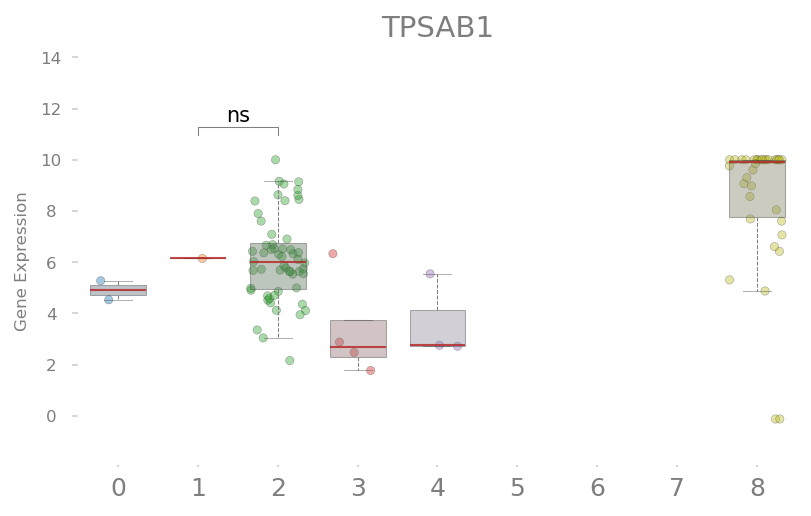

                      CPA3 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  7.541           8      424                424   
ACACTGAGTCATACTG-15  4.949           2     2740               2740   
GCGACCAGTCCTAGCG-16  3.857           4     1300               1300   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
ACACTGAGTCATACTG-15     10012.000         1128.000    10.531   -21.480  
GCGACCAGTCCTAGCG-16      3957.000          271.000   -19.222    -0.099  
                     TPSB2 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  7.690           8      424                424   
ACACTGAGTCATACTG-15  4.338           2     2740               2740   
ACGGGCTCATATGCTG-16  3.315           4     1998               1998   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  


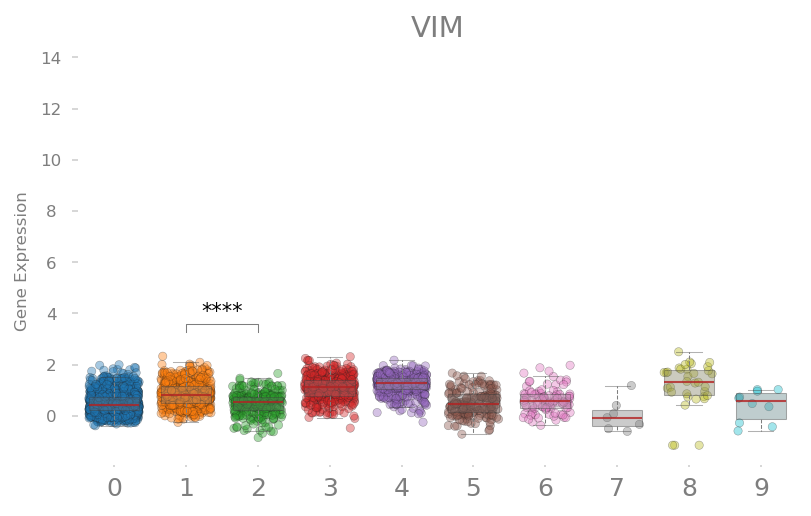

                      HPGDS leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  10.000           8      424                424   
GCGACCAGTCCTAGCG-16   6.135           4     1300               1300   
CTAACTTAGACTGGGT-15  10.000           2      391                391   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GCGACCAGTCCTAGCG-16      3957.000          271.000   -19.222    -0.099  
CTAACTTAGACTGGGT-15       723.000           89.000    19.397   -10.354  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=3.500e+00




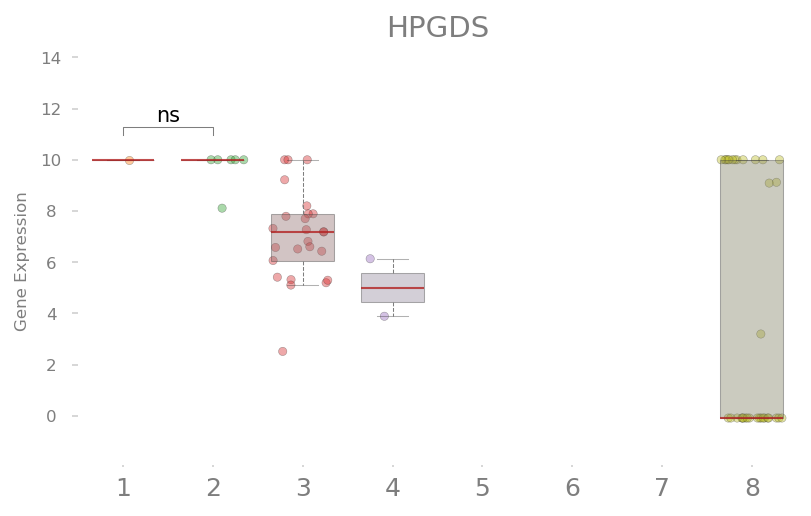

                        TTR leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.070           8      424                424   
CTACATTGTCAATACC-14   5.942           9      922                922   
GAGTCCGTCATGGTCA-12  10.000           9      624                624   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
CTACATTGTCAATACC-14      2453.000          141.000     9.542    35.175  
GAGTCCGTCATGGTCA-12       967.000            0.000     8.286    37.293  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.000e-01 U_stat=6.000e+00




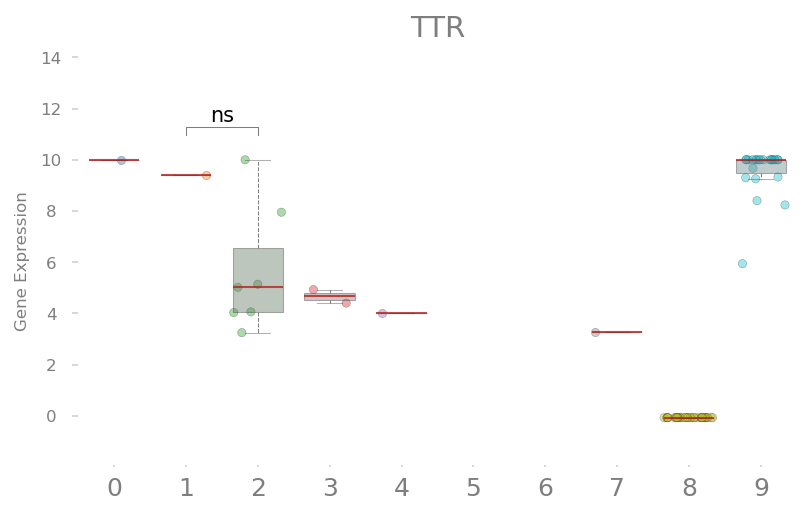

                       TFF3 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.284           8      424                424   
GGCAATTAGGAGCGTT-15   2.576           2      468                468   
CGTGAGCAGCTGCCCA-15   2.363           1      515                515   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
GGCAATTAGGAGCGTT-15       698.000          113.000    14.524   -15.363  
CGTGAGCAGCTGCCCA-15       869.000           48.000     6.364     3.593  
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1 vs. 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.456e-02 U_stat=1.291e+03




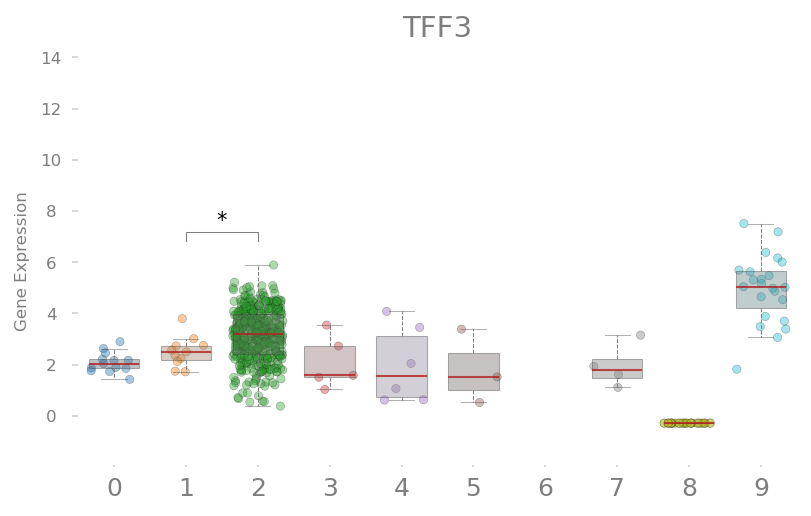

                     C6orf58 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14   -0.058           8      424                424   
AGGGAGTAGAACAACT-12   10.000           9      656                656   
CTACATTGTCAATACC-14   10.000           9      922                922   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
AGGGAGTAGAACAACT-12      1530.000           92.000     9.647    35.115  
CTACATTGTCAATACC-14      2453.000          141.000     9.542    35.175  
                     PCSK1N leiden_0.25  n_genes  n_genes_by_counts  \
CGCTATCTCCTTGGTC-11   7.143           0      479                479   
CGTAGGCTCAGCATGT-14  -0.113           8      424                424   
ATAGACCTCGTCTGCT-11   7.409           0      538                538   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGCTATCTCCTTGGTC-11      1300.000          123.000    29.638 

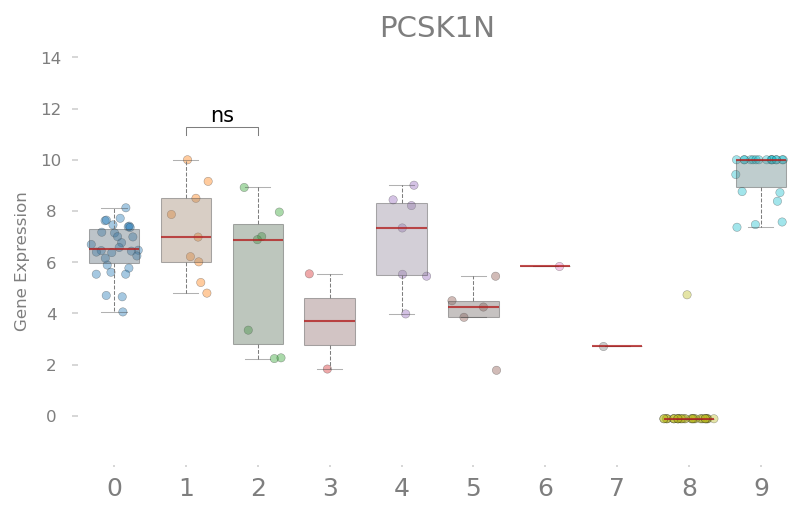

                     BPIFB2 leiden_0.25  n_genes  n_genes_by_counts  \
CGTAGGCTCAGCATGT-14  -0.057           8      424                424   
CCGGGATGTCAGAAGC-13  -0.057           8      571                571   
AACTCCCAGAGCAATT-12  10.000           9      300                300   

                     total_counts  total_counts_mt  X_umap-0  X_umap-1  
CGTAGGCTCAGCATGT-14       960.000          111.000    32.961   -10.769  
CCGGGATGTCAGAAGC-13      1178.000           78.000    33.645   -11.167  
AACTCCCAGAGCAATT-12       603.000            0.000     8.470    36.834  


In [12]:
for gene in GenesOfInterest:
    kws1 = {'s':4, 'jitter':.35, 'alpha':0.4, 'dodge':True, 'linewidth':0.25,'edgecolor':'#1E1E1E'}
    kws2 = {'linewidth':0.5, 'width':0.7, 'dodge':True, 'showcaps':True, 'whis':1.5, 'fliersize':0, 'saturation':0.20}
    medianprops=dict(linestyle='-', linewidth=1, color="firebrick", alpha=0.8); capprops=dict(linestyle="-", alpha=.4, linewidth=.5)
    boxprops = dict(linestyle="-", alpha=.4, linewidth=.5); whiskerprops=dict(linestyle="--", linewidth=.5, color="#7E7E7E")
    #          -          -          -          -          -          -          -          -          -          -          -          -          -          -  
    try:
        fig, ax = plt.subplots(figsize=(14/2.54, 9/2.54), dpi=150)
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          - 
        plotdf = sc.get.obs_df(pcHVG_data, keys=[gene, resolution, 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt'],
                       obsm_keys=[("X_umap", 0), ("X_umap", 1)])
        #         .         .         .         .         .         .         .         .         .         .         .         .
        plotdf = plotdf[(plotdf[gene] != plotdf[gene].min()) | (plotdf[resolution] == '8')]
        print(plotdf.head(3))
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          - 
        g = sns.stripplot(data = plotdf, x=resolution, y=gene, **kws1, zorder=0, ax=ax)
        g = sns.boxplot(data   = plotdf, x=resolution, y=gene, medianprops=medianprops, capprops=capprops,
                        boxprops=boxprops, whiskerprops=whiskerprops, **kws2, zorder=1, ax=ax)
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          -   
        ax.set_title(gene, fontsize=14, color="#7E7E7E", pad=10)
        plt.xlabel("", fontsize=0); plt.ylabel("Gene Expression", fontsize=8, color="#7E7E7E", labelpad=5)
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          -    
        ax.set_ylim([-1.9, 14]); ax.set_yscale('linear'); sns.despine(left=True, bottom=True) 
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          -        
        ax.tick_params(axis="x", colors="#cfcfcf", pad=0, length=1); ax.tick_params(axis="y", colors="#cfcfcf", pad=0, length=3)
        plt.xticks(fontsize=12, color="#7E7E7E", rotation=0, ha="center"); ax.tick_params(axis='x', which='major', pad=5)
        plt.yticks(fontsize= 8, color="#7E7E7E", rotation=0, ha="center"); ax.tick_params(axis='y', which='major', pad=10)
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          -     
        annot_kws1   = {'pairs':pairs, 'data':plotdf, 'x':resolution, 'y':gene}
        annot_params = {"test":"Mann-Whitney", "line_width":0.5, "color":"#7E7E7E", "text_format":"star", 'loc':'inside'}
        ax, test_results = Annotator(ax, **annot_kws1).reset_configuration().configure(**annot_params, verbose=3).apply_and_annotate()
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          -   
        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles[0:2], labels[0:2], fontsize=6, bbox_to_anchor=(1.02,1), loc=2, borderaxespad=0.1)
        plt.legend([],[],frameon=False)
        #          -          -          -          -          -          -          -          -          -          -          -          -          -          -       
        plt.tight_layout()
        plt.savefig("./GSE279781_DEG_Clusters_v02.png", format="png", bbox_inches="tight", dpi=300)
        print("\n")
        plt.show()
    except:
        plt.close() 

In [13]:
# Path to your audio file
audio_file = "../../data/clock-chime-88027.mp3"
display(Audio(audio_file, autoplay=True))

In [14]:
elapsed_time = time.time() - start
minutes, seconds = divmod(elapsed_time, 60)
print("'GSE279781_DEG_Clusters_v02' script run time:", f"{int(minutes)} min {int(seconds)} sec.")

'GSE279781_DEG_Clusters_v02' script run time: 1 min 31 sec.
